## PROJECT TEAM ID : PTID-CDS-OCT-24-2098
### PROJECT ID : PRCP-1017-AutoPricePred
### PROJECT NAME : Automobile Imports Price Prediction

## Problem Statement

The goal of this project is to develop a machine learning model that predicts car prices based on various features provided in the dataset. By leveraging different car attributes such as engine size, weight, horsepower, and other relevant variables, the model will enable businesses to understand the key factors that drive car prices in the market.



# Attribute Information

## 1. Symboling
- **Description**: A numerical value used by insurance companies to assess risk associated with vehicle models. Higher values indicate a higher risk of accidents and thus, higher insurance premiums.
- **Range**: -3 (low risk) to 3 (high risk).

## 2. Normalized Losses
- **Description**: Represents the average annual losses incurred by insurance companies for different car models, adjusted for fair comparison.
- **Range**: Continuous values from 65 to 256.

## 3. Make
- **Description**: The manufacturer of the vehicle, representing various automotive companies.
- **Examples**: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugeot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo.

## 4. Fuel Type
- **Description**: The type of fuel that powers the vehicle's engine.
- **Options**: diesel or gas.

## 5. Aspiration
- **Description**: Refers to the method of air intake for combustion in the engine. 
- **Types**: 
  - **std**: Standard or naturally aspirated.
  - **turbo**: Turbocharged or supercharged.

## 6. Number of Doors
- **Description**: Indicates the number of doors on the vehicle.
- **Options**: two-door or four-door.

## 7. Body Style
- **Description**: The shape and configuration of the vehicle's body.
- **Types**: hardtop, wagon, sedan, hatchback, convertible.

## 8. Drive Wheels
- **Description**: Specifies which wheels are powered by the engine.
- **Types**: 
  - **rwd**: Rear wheel drive.
  - **fwd**: Front wheel drive.
  - **4wd**: Four wheel drive.

## 9. Engine Location
- **Description**: The positioning of the engine in relation to the vehicle.
- **Options**: front or rear.

## 10. Wheelbase
- **Description**: The distance between the front and rear axles, affecting stability and handling.
- **Range**: Continuous from 86.6 to 120.9 inches.

## 11. Length
- **Description**: The overall length of the vehicle.
- **Range**: Continuous from 141.1 to 208.1 inches.

## 12. Width
- **Description**: The overall width of the vehicle.
- **Range**: Continuous from 60.3 to 72.3 inches.

## 13. Height
- **Description**: The overall height of the vehicle.
- **Range**: Continuous from 47.8 to 59.8 inches.

## 14. Curb Weight
- **Description**: The weight of the vehicle with a full tank of fuel and all fluids but without passengers or cargo.
- **Range**: Continuous from 1488 to 4066 pounds.

## 15. Engine Type
- **Description**: The configuration of the engine.
- **Types**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

## 16. Number of Cylinders
- **Description**: The number of cylinders in the engine, which affects performance and efficiency.
- **Options**: two, three, four, five, six, eight, twelve.

## 17. Engine Size
- **Description**: The total volume of the engine cylinders, typically measured in liters or cubic centimeters.
- **Range**: Continuous from 61 to 326.

## 18. Fuel System
- **Description**: The mechanism used to deliver fuel to the engine.
- **Types**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

## 19. Bore
- **Description**: The diameter of the engine cylinders, influencing power output.
- **Range**: Continuous from 2.54 to 3.94 inches.

## 20. Stroke
- **Description**: The distance traveled by the piston within the cylinder during one engine cycle.
- **Range**: Continuous from 2.07 to 4.17 inches.

## 21. Compression Ratio
- **Description**: The ratio of the cylinder's volume at its largest and smallest capacity, affecting efficiency and power.
- **Range**: Continuous from 7 to 23.

## 22. Horsepower
- **Description**: A measure of the engine's power output, indicating performance capabilities.
- **Range**: Continuous from 48 to 288.

## 23. Peak RPM
- **Description**: The maximum revolutions per minute that the engine can achieve.
- **Range**: Continuous from 4150 to 6600 RPM.

## 24. City MPG
- **Description**: Fuel efficiency measured in miles per gallon during city driving conditions.
- **Range**: Continuous from 13 to 49 MPG.

## 25. Highway MPG
- **Description**: Fuel efficiency measured in miles per gallon during highway driving conditions.
- **Range**: Continuous from 16 to 54 MPG.

## 26. Price
- **Description**: The market price of the vehicle, usually expressed in dollars.
- **Range**: Continuous from 5118 to 45400.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv("auto_imports.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Rename the Columns
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration", 
    "num_of_doors", "body_style", "drive_wheels", "engine_location", 
    "wheel_base", "length", "width", "height", "curb_weight", 
    "engine_type", "num_of_cylinders", "engine_size", "fuel_system", 
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", 
    "city_mpg", "highway_mpg", "price"
]

data.columns = column_names


In [4]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Insights

In this Dataset, **Price** is an outcome column.

And price is dependent on all those features which are available in the dataset.

**Price** is the target.

**Make**, **model**, **year**, **fuel**, and **engine** are independent variables.

Attributes like **make**, **model**, **year**, and **body type** can influence prices. Newer models and luxury brands tend to command higher prices.

This data basically tells us about the price by the management.

They can accordingly manipulate the design of the cars, the business strategy, etc., to meet certain price levels.


# basic checks

In [5]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
data.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
data.shape

(201, 26)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
wheel_base,201.0,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9
length,201.0,174.200995,12.322175,141.1,166.8,173.2,183.5,208.1
width,201.0,65.889055,2.101471,60.3,64.1,65.5,66.6,72.0
height,201.0,53.766667,2.447822,47.8,52.0,54.1,55.5,59.8
curb_weight,201.0,2555.666667,517.296727,1488.0,2169.0,2414.0,2926.0,4066.0
engine_size,201.0,126.875622,41.546834,61.0,98.0,120.0,141.0,326.0
compression_ratio,201.0,10.164279,4.004965,7.0,8.6,9.0,9.4,23.0
city_mpg,201.0,25.179104,6.423220,13.0,19.0,24.0,30.0,49.0
highway_mpg,201.0,30.686567,6.815150,16.0,25.0,30.0,34.0,54.0


## Insights

- **Symboling**: Ranges from -2 to 3, with an average of 0.83.
- **Wheel Base**: Average of 98.85 inches, ranging from 86.6 to 120.9 inches.
- **Length**: Average length is 174.23 inches, with a minimum of 141.1 inches and a maximum of 208.1 inches.
- **Width**: Average width is 65.90 inches, ranging from 60.3 to 72.0 inches.
- **Height**: Average height is 53.79 inches, with a minimum of 47.8 inches and a maximum of 59.8 inches.
- **Curb Weight**: Average weight is 2,555.71 lbs, ranging from 1,488 lbs to 4,066 lbs.
- **Engine Size**: Average of 126.86 cubic inches, ranging from 61.0 to 326.0 cubic inches.
- **Compression Ratio**: Average of 10.17, with a range from 7.0 to 23.0.
- **City MPG**: Average is 25.20, ranging from 13.0 to 49.0 MPG.
- **Highway MPG**: Average of 30.71, ranging from 16.0 to 54.0 MPG.
- **Price**: Average price is $13,205.69, with a minimum of 5,118 and a maximum of 45,400.


In [9]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [10]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
data.isin(['?']).sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

### Observations

- The presence of `?` symbols in the dataset has caused columns such as `normalized_losses`, `num_of_doors`, `bore`, `stroke`, `horsepower`, and `peak_rpm` to be incorrectly classified as `'object'` data types.
- Replacing `?` with `NaN` will enable Pandas to recognize these values as missing data.
- After replacing, the affected columns need to be converted to their appropriate data types (either `int` or `float`).


In [12]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

In [13]:
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [14]:
# Changing the data type of specified columns
data['normalized_losses'] = data['normalized_losses'].astype('float64')
data['horsepower'] = data['horsepower'].astype('float64')
data['peak_rpm'] = data['peak_rpm'].astype('float64')
data['bore'] = data['bore'].astype('float64')
data['stroke'] = data['stroke'].astype('float64')


In [15]:
cat_col = data.select_dtypes(include="O").columns

for i in cat_col:
    print(data[i].value_counts())
    print(f"======== {i} ========")


make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64
======== make ========
fuel_type
gas       181
diesel     20
Name: count, dtype: int64
======== fuel_type ========
aspiration
std      165
turbo     36
Name: count, dtype: int64
======== aspiration ========
num_of_doors
four    113
two      86
Name: count, dtype: int64
======== num_of_doors ========
body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
======== body_style ========
drive_wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64


In [16]:
cat_data=data.select_dtypes(include="O").columns
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("-----------------------")

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64
-----------------------
fuel_type ['gas' 'diesel']
fuel_type
gas       181
diesel     20
Name: count, dtype: int64
-----------------------
aspiration ['std' 'turbo']
aspiration
std      165
turbo     36
Name: count, dtype: int64
-----------------------
num_of_doors ['two' 'four' nan]
num_of_doors
four   

# Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis

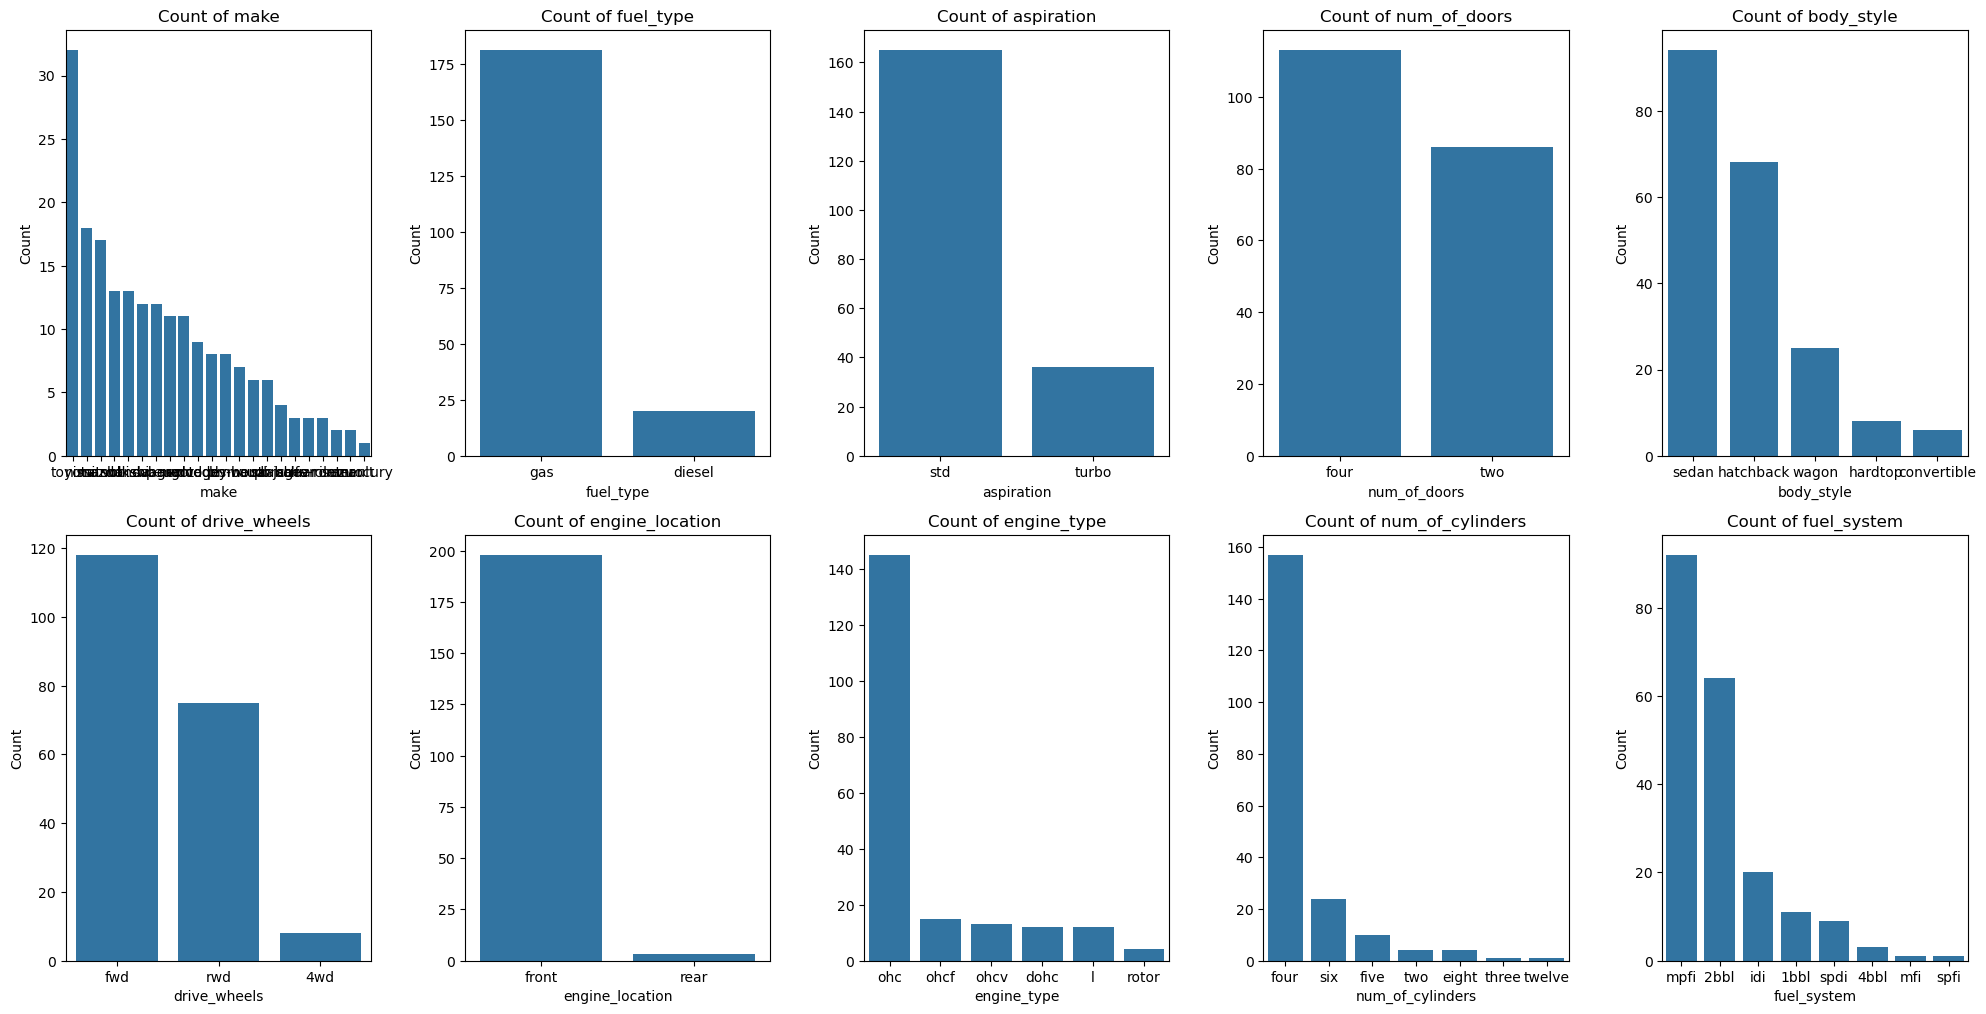

In [17]:
plt.figure(figsize=(20, 30))

plotnumber = 1

cat_columns = data.select_dtypes(include=['object']).columns

for column in cat_columns:
    if plotnumber <= 26:
        plt.subplot(6, 5, plotnumber)
        sns.countplot(data=data, x=column, order=data[column].value_counts().index)
        plt.title(f'Count of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()

<Axes: xlabel='symboling', ylabel='count'>

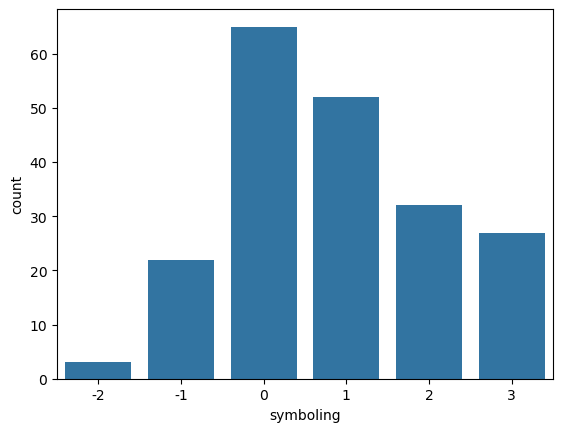

In [18]:
sns.barplot(data['symboling'].value_counts())

# Insights

1. **Car Brands**:
   - **Toyota** is the most common brand (32), followed by **Nissan** (18), **Mazda** (17), and **Mitsubishi** (13).
   - Brands like **Jaguar** and **Alfa-Romeo** have lower counts (3), indicating they are less common.

2. **Fuel Type**:
   - Majority of vehicles use **gas** (181), while **diesel** is less common (20).
   - Gas-powered vehicles dominate the dataset.

3. **Aspiration**:
   - Most vehicles have **standard aspiration** (165) compared to **turbo** (36).
   - Indicates a preference for reliability in engine design.

4. **Number of Doors**:
   - More **four-door** vehicles (113) than **two-door** (86).
   - Suggests four-door vehicles are favored for practicality.

5. **Body Style**:
   - **Sedan** (94) is the most common body style, followed by **hatchback** (68) and **wagon** (25).
   - Lower counts for **hardtop** (8) and **convertible** (6).

6. **Drive Wheels**:
   - **Front-wheel drive (FWD)** is the most common (118), more than **rear-wheel drive (RWD)** (75) and **four-wheel drive (4WD)** (8).
   - Indicates a preference for better traction and handling.

7. **Engine Location**:
   - Most vehicles have a **front engine** (198), very few have a **rear engine** (3).
   - Shows a preference for front-engine designs.

8. **Engine Type**:
   - Dominated by **OHC** (145), with **OHCF** (15) and **OHCV** (13).
   - Indicates diversity in engine design.

9. **Number of Cylinders**:
   - Most vehicles have **four cylinders** (157).
   - Fewer vehicles with **six** (24), **eight** (4), showing a preference for fuel efficiency.

10. **Fuel System**:
    - **MPFI** (92) is the most common fuel system, followed by **2bbl** (64).
    - Suggests a trend towards modern fuel injection systems.


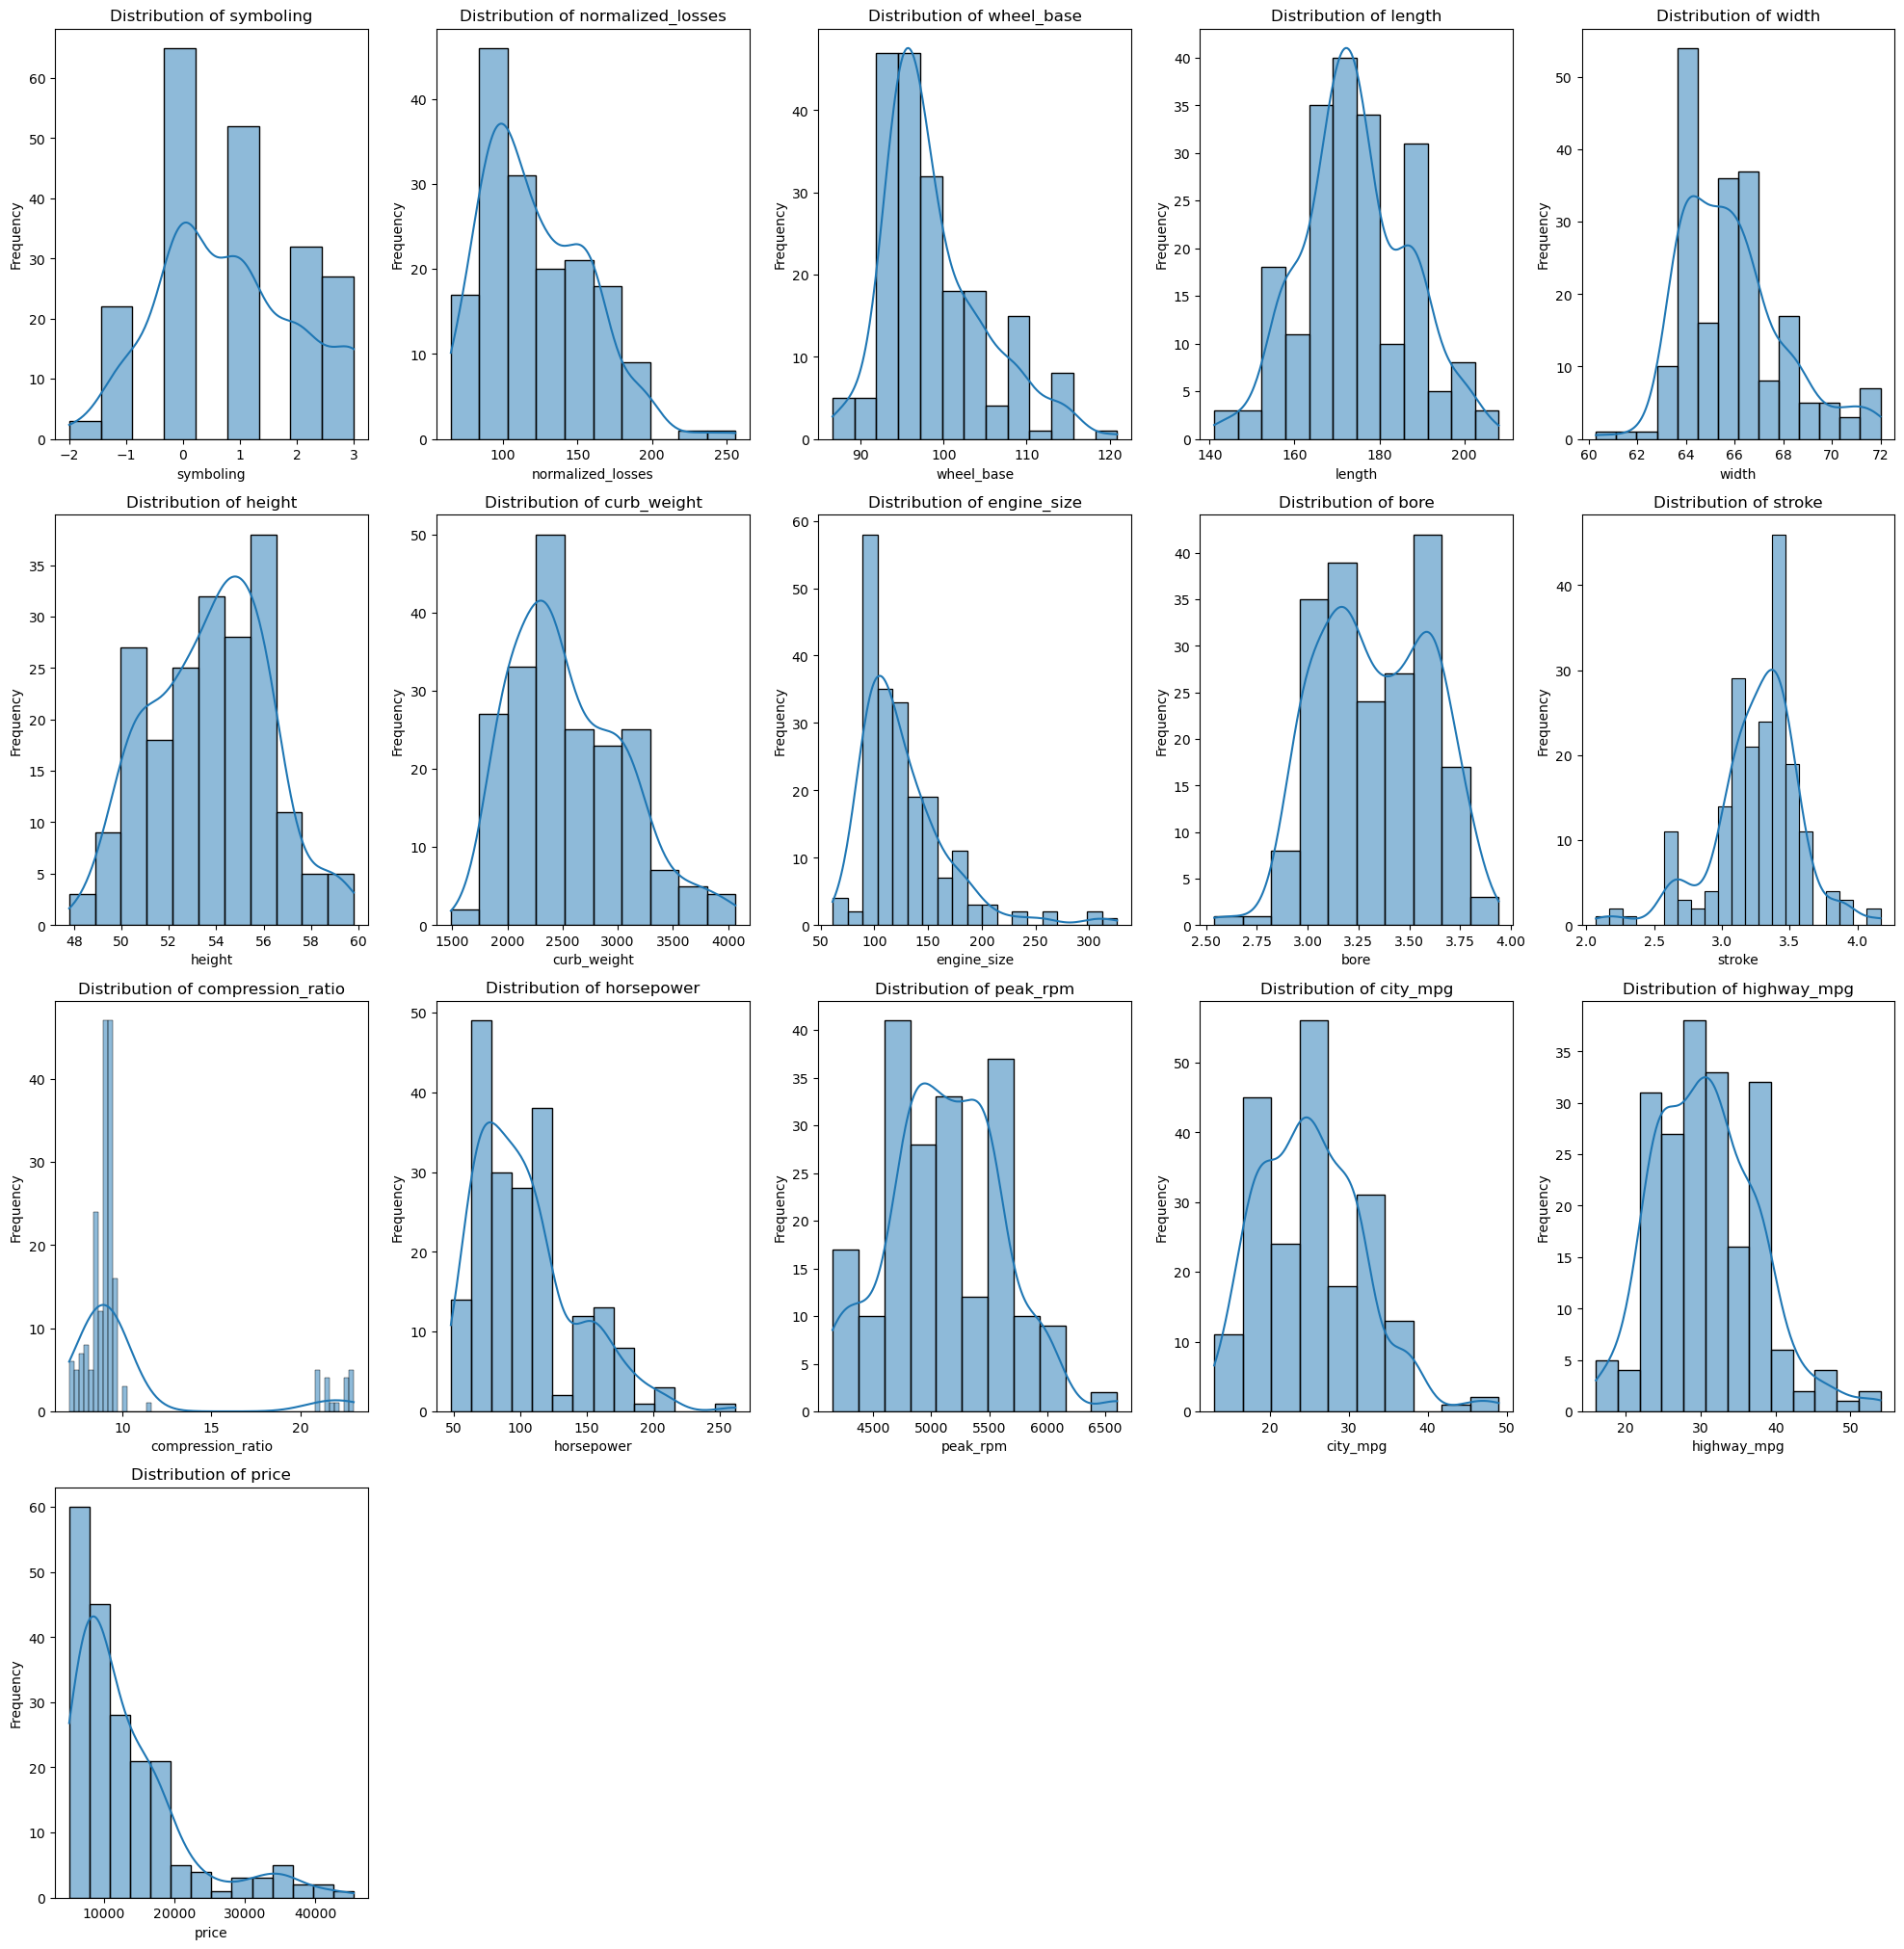

In [19]:
plt.figure(figsize=(20, 30))

plotnumber = 1

for column in data.columns:
    if (data[column].dtype in ['int64', 'float64']) and plotnumber <= 26:
        plt.subplot(6, 5, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()

# Insights

## 1. **Symboling**
   - The histogram for the `symboling` attribute shows the distribution of car risk levels. A significant concentration around 0 indicates that most vehicles have low to moderate risk levels.

## 2. **Normalized Losses**
   - **Normalized Losses** display a bimodal distribution. Most vehicles cluster around average values, with fewer extreme losses, suggesting manageable risk for most cars.

## 3. **Wheel Base**
   - The `wheel_base` histogram shows a peak around the average (98-100 inches). The KDE curve supports this, indicating that cars with longer wheelbases are less common.

## 4. **Length**
   - The distribution of `length` indicates a majority of cars are between 160 to 180 inches long. The KDE highlights this trend, suggesting consumer preference for this size range for practicality.

## 5. **Width**
   - The `width` attribute tends to cluster around the average (around 65-70 inches). The KDE indicates a strong preference for vehicles within this width range.

## 6. **Height**
   - The `height` distribution shows a peak between 60 to 70 inches, with the KDE confirming that taller cars are valued more highly, reflecting consumer preferences for spaciousness.

## 7. **Curb Weight**
   - The `curb_weight` histogram shows a right-skewed distribution, with a peak around 2500 lbs. The KDE suggests that heavier cars are generally associated with better build quality and safety features.

## 8. **Engine Size**
   - The distribution for `engine_size` is right-skewed, indicating that while most vehicles have smaller engines, there is a notable presence of larger engines, which aligns with higher pricing.

## 9. **Bore**
   - The `bore` attribute demonstrates a normal distribution around the average (3.3 inches), indicating a balance between power and efficiency in engine designs.

## 10. **Stroke**
   - The `stroke` histogram reflects a slight right skew, indicating a tendency for vehicles to have longer strokes for better power output, which is confirmed by the KDE curve.

## 11. **Compression Ratio**
   - The `compression_ratio` shows a peak at the lower end of the range, with the KDE indicating that most vehicles favor lower compression ratios for optimal fuel efficiency.

## 12. **Horsepower**
   - The distribution of `horsepower` reveals a right-skewed trend, with higher horsepower vehicles becoming increasingly rare. The KDE reinforces this finding, indicating that higher horsepower is often associated with premium pricing.

## 13. **Peak RPM**
   - The `peak_rpm` histogram displays a peak around 5000 RPM, suggesting that consumers prefer engines with higher RPM capabilities, leading to a more dynamic driving experience.

## 14. **City MPG and Highway MPG**
   - Both `city_mpg` and `highway_mpg` histograms display peaks at the higher end, confirming a preference for fuel-efficient vehicles in both urban and highway driving conditions.

## 15. **Price**
   - The `price` distribution shows a right-skewed pattern, with most cars priced below $20,000. The KDE confirms that luxury and higher-end vehicles are less common in the dataset.




# Bivarient Analysis

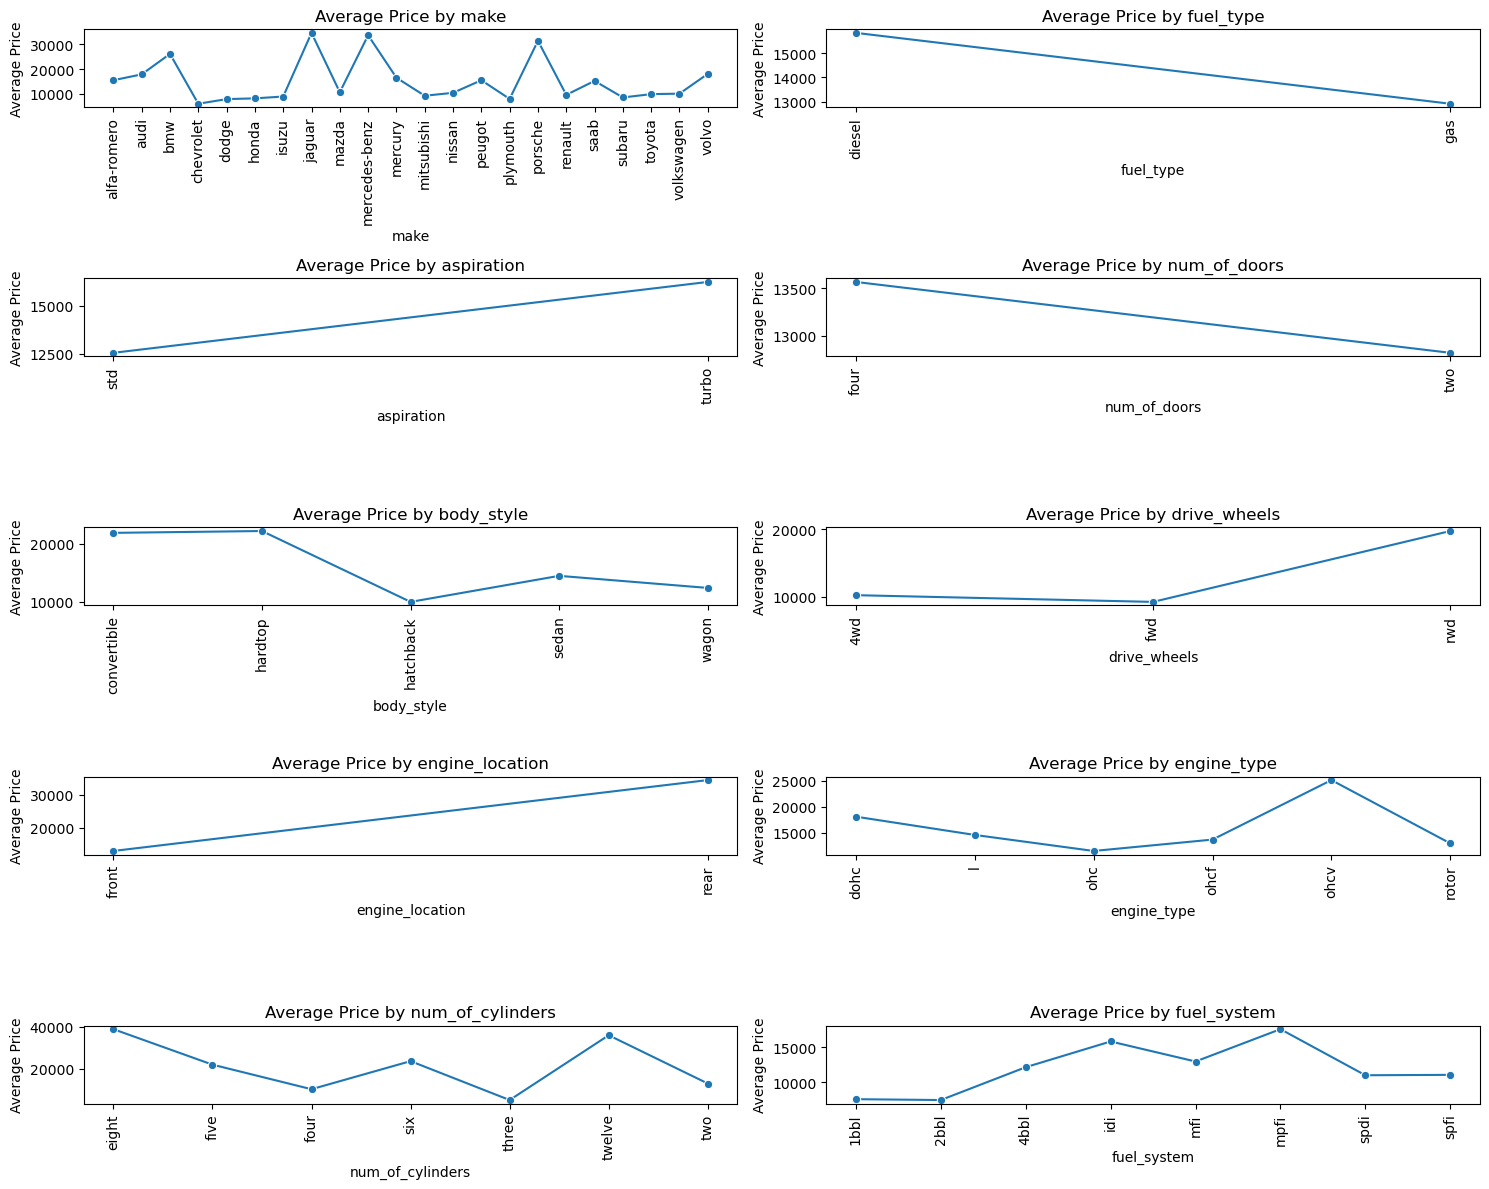

In [20]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Loop through each categorical column for line plots
for i, column in enumerate(cat_columns):
    plt.subplot(5, 2, i + 1)  # Adjusting subplot grid for 10 plots
    average_price = data.groupby(column)['price'].mean().reset_index()  # Calculate average price
    sns.lineplot(data=average_price, x=column, y='price', marker='o')  # Create line plot
    plt.title(f'Average Price by {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Average Price', fontsize=10)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Insights for Average Price by Categorical Columns

1. **Make**: Luxury brands like BMW and Mercedes-Benz have higher average prices.
2. **Fuel Type**: Diesel vehicles typically have higher prices than gas vehicles.
3. **Aspiration**: Turbocharged vehicles command higher prices than naturally aspirated ones.
4. **Number of Doors**: Four-door vehicles are generally more expensive than two-door models.
5. **Body Style**: Convertibles and hardtops are priced higher compared to sedans or hatchbacks.
6. **Drive Wheels**: Rear-wheel drive vehicles tend to have higher prices than front-wheel drive or four-wheel drive.
7. **Engine Location**: Rear engine vehicles are priced significantly higher than front-engine models.
8. **Engine Type**: DOHC engines usually lead to higher vehicle prices.
9. **Number of Cylinders**: Vehicles with eight cylinders have the highest average prices.
10. **Fuel System**: MPFI vehicles show higher average prices due to better performance.

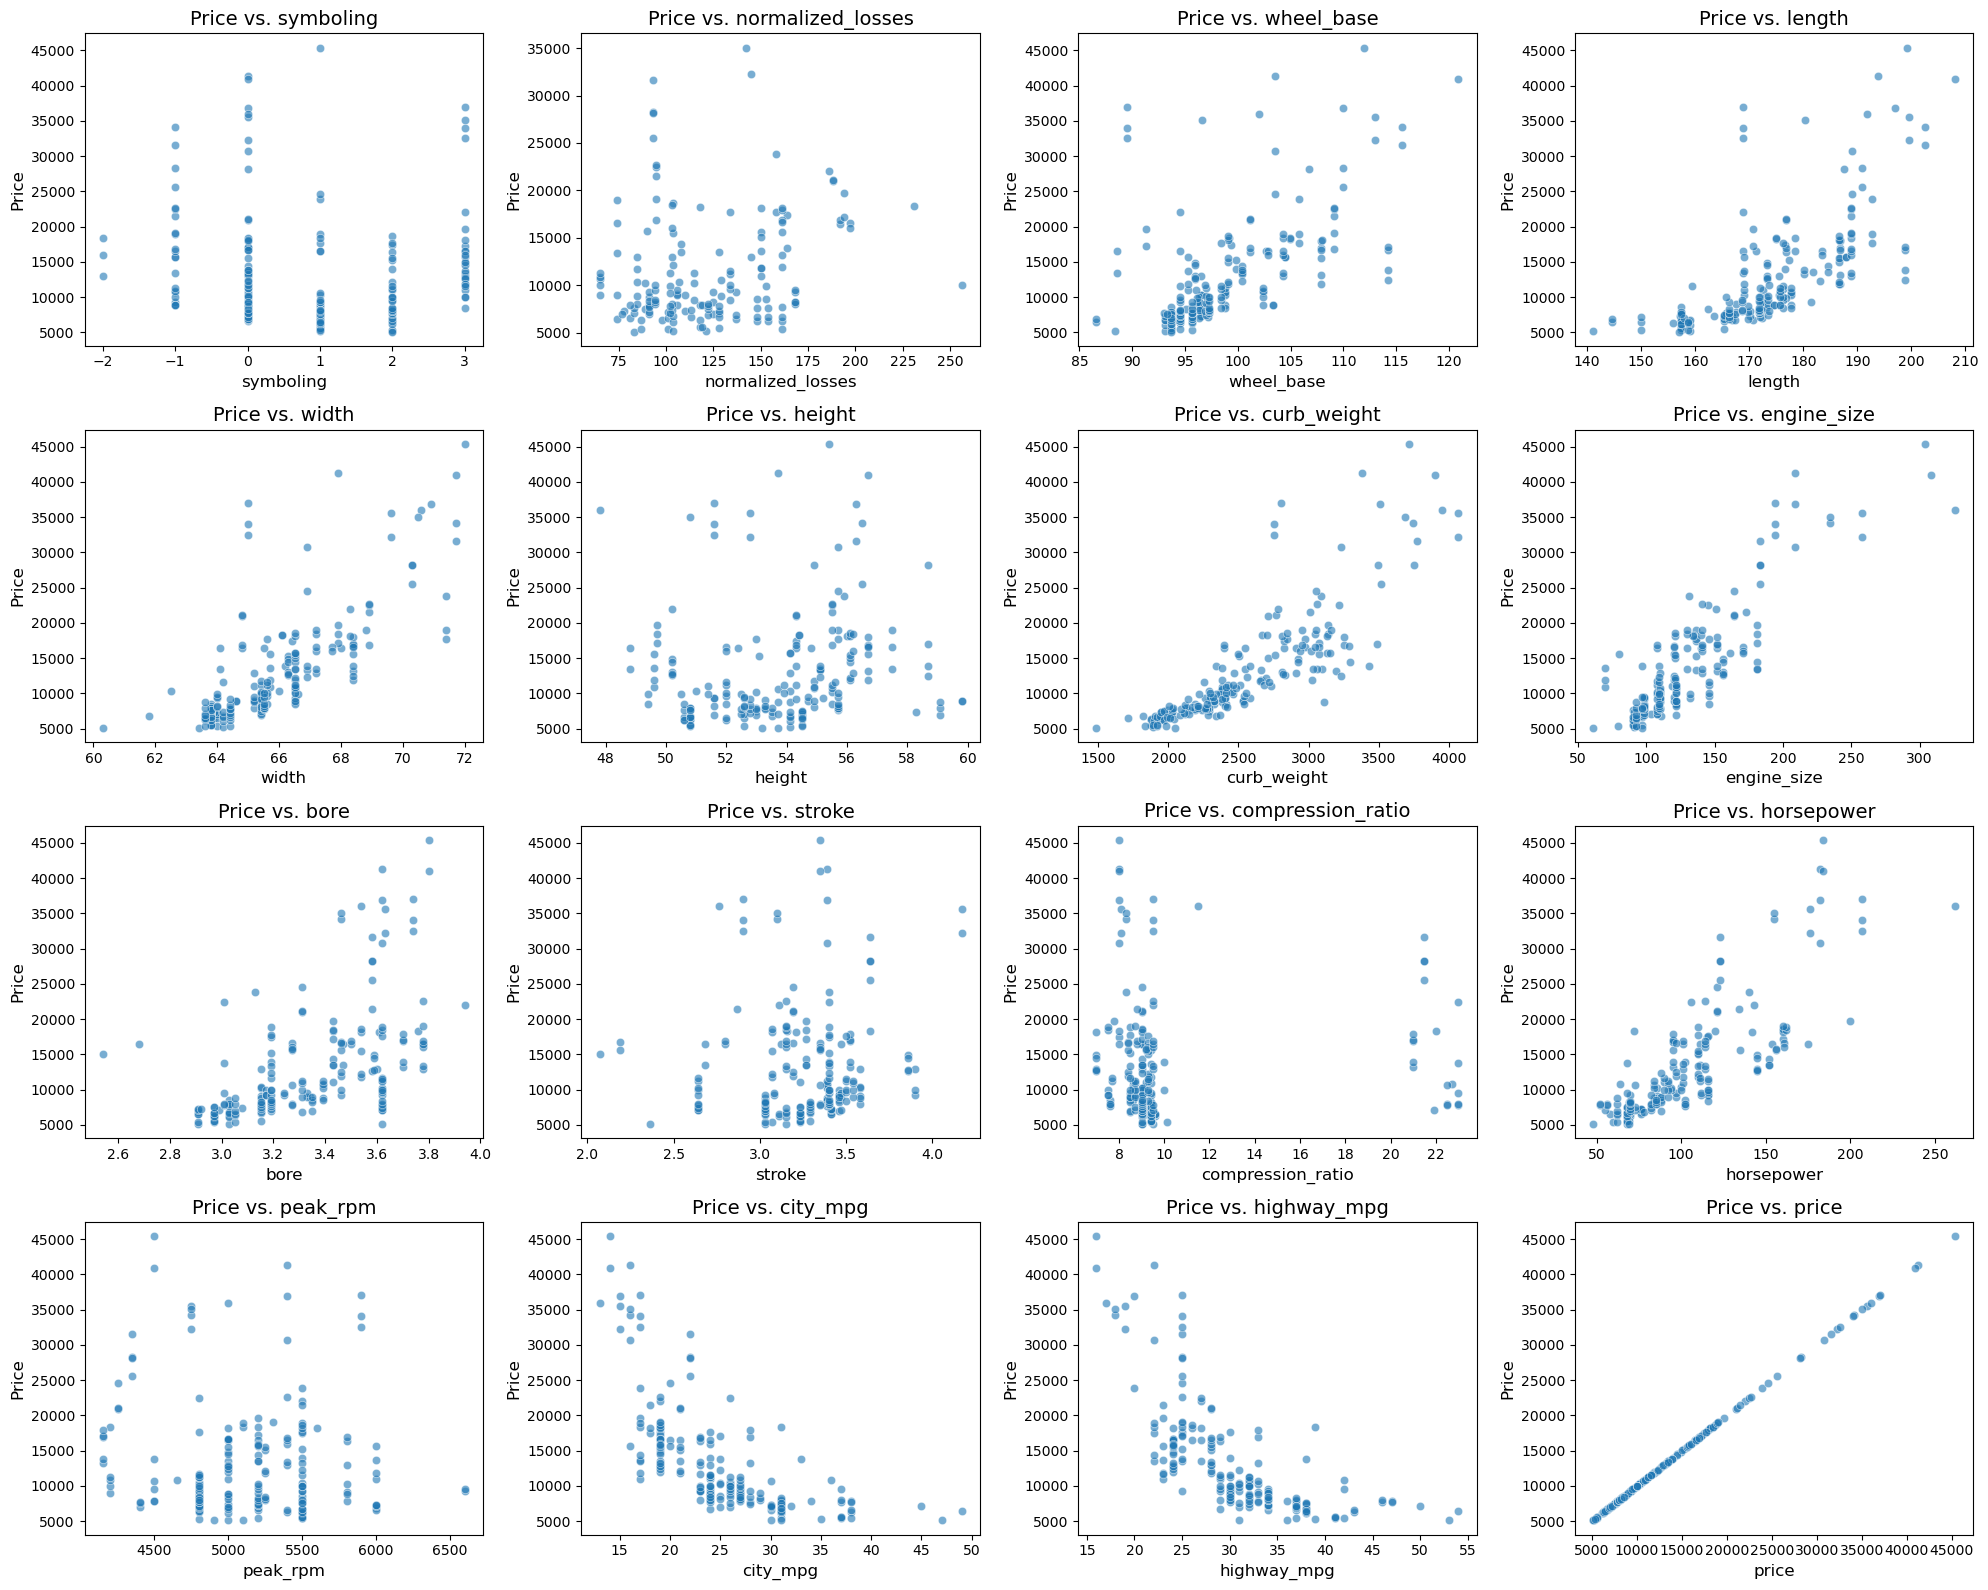

In [21]:

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


plt.figure(figsize=(20, 16))  


for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)  
    sns.scatterplot(data=data, x=column, y='price', alpha=0.6)  
    plt.title(f'Price vs. {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Price', fontsize=12)

plt.tight_layout() 
plt.show()

# Insights on Vehicle Pricing
  
1. **Numeric Features (Wheel Base, Length, Width) vs. Price**: 
   - Larger dimensions often correlate with higher prices, indicating that more substantial cars tend to be more expensive.

2. **Curb Weight vs. Price**: 
   - Heavier vehicles generally have higher prices, possibly due to advanced materials or larger engines.

3. **Engine Type and Size vs. Price**: 
    - Larger engines often command higher prices, reflecting their performance capabilities.

4. **Fuel System, Bore, Stroke, Compression Ratio vs. Price**: 
    - Relationships here are complex; various engine specifications influence pricing diversely.

5. **Horsepower and Peak RPM vs. Price**: 
    - Cars with higher horsepower and peak RPMs typically have higher prices, as more powerful engines are often premium-priced.

6. **Fuel Efficiency (City MPG, Highway MPG) vs. Price**: 
    - Cars with better fuel efficiency may be priced higher, reflecting their long-term cost-saving benefits.



# Multivarient Analysis

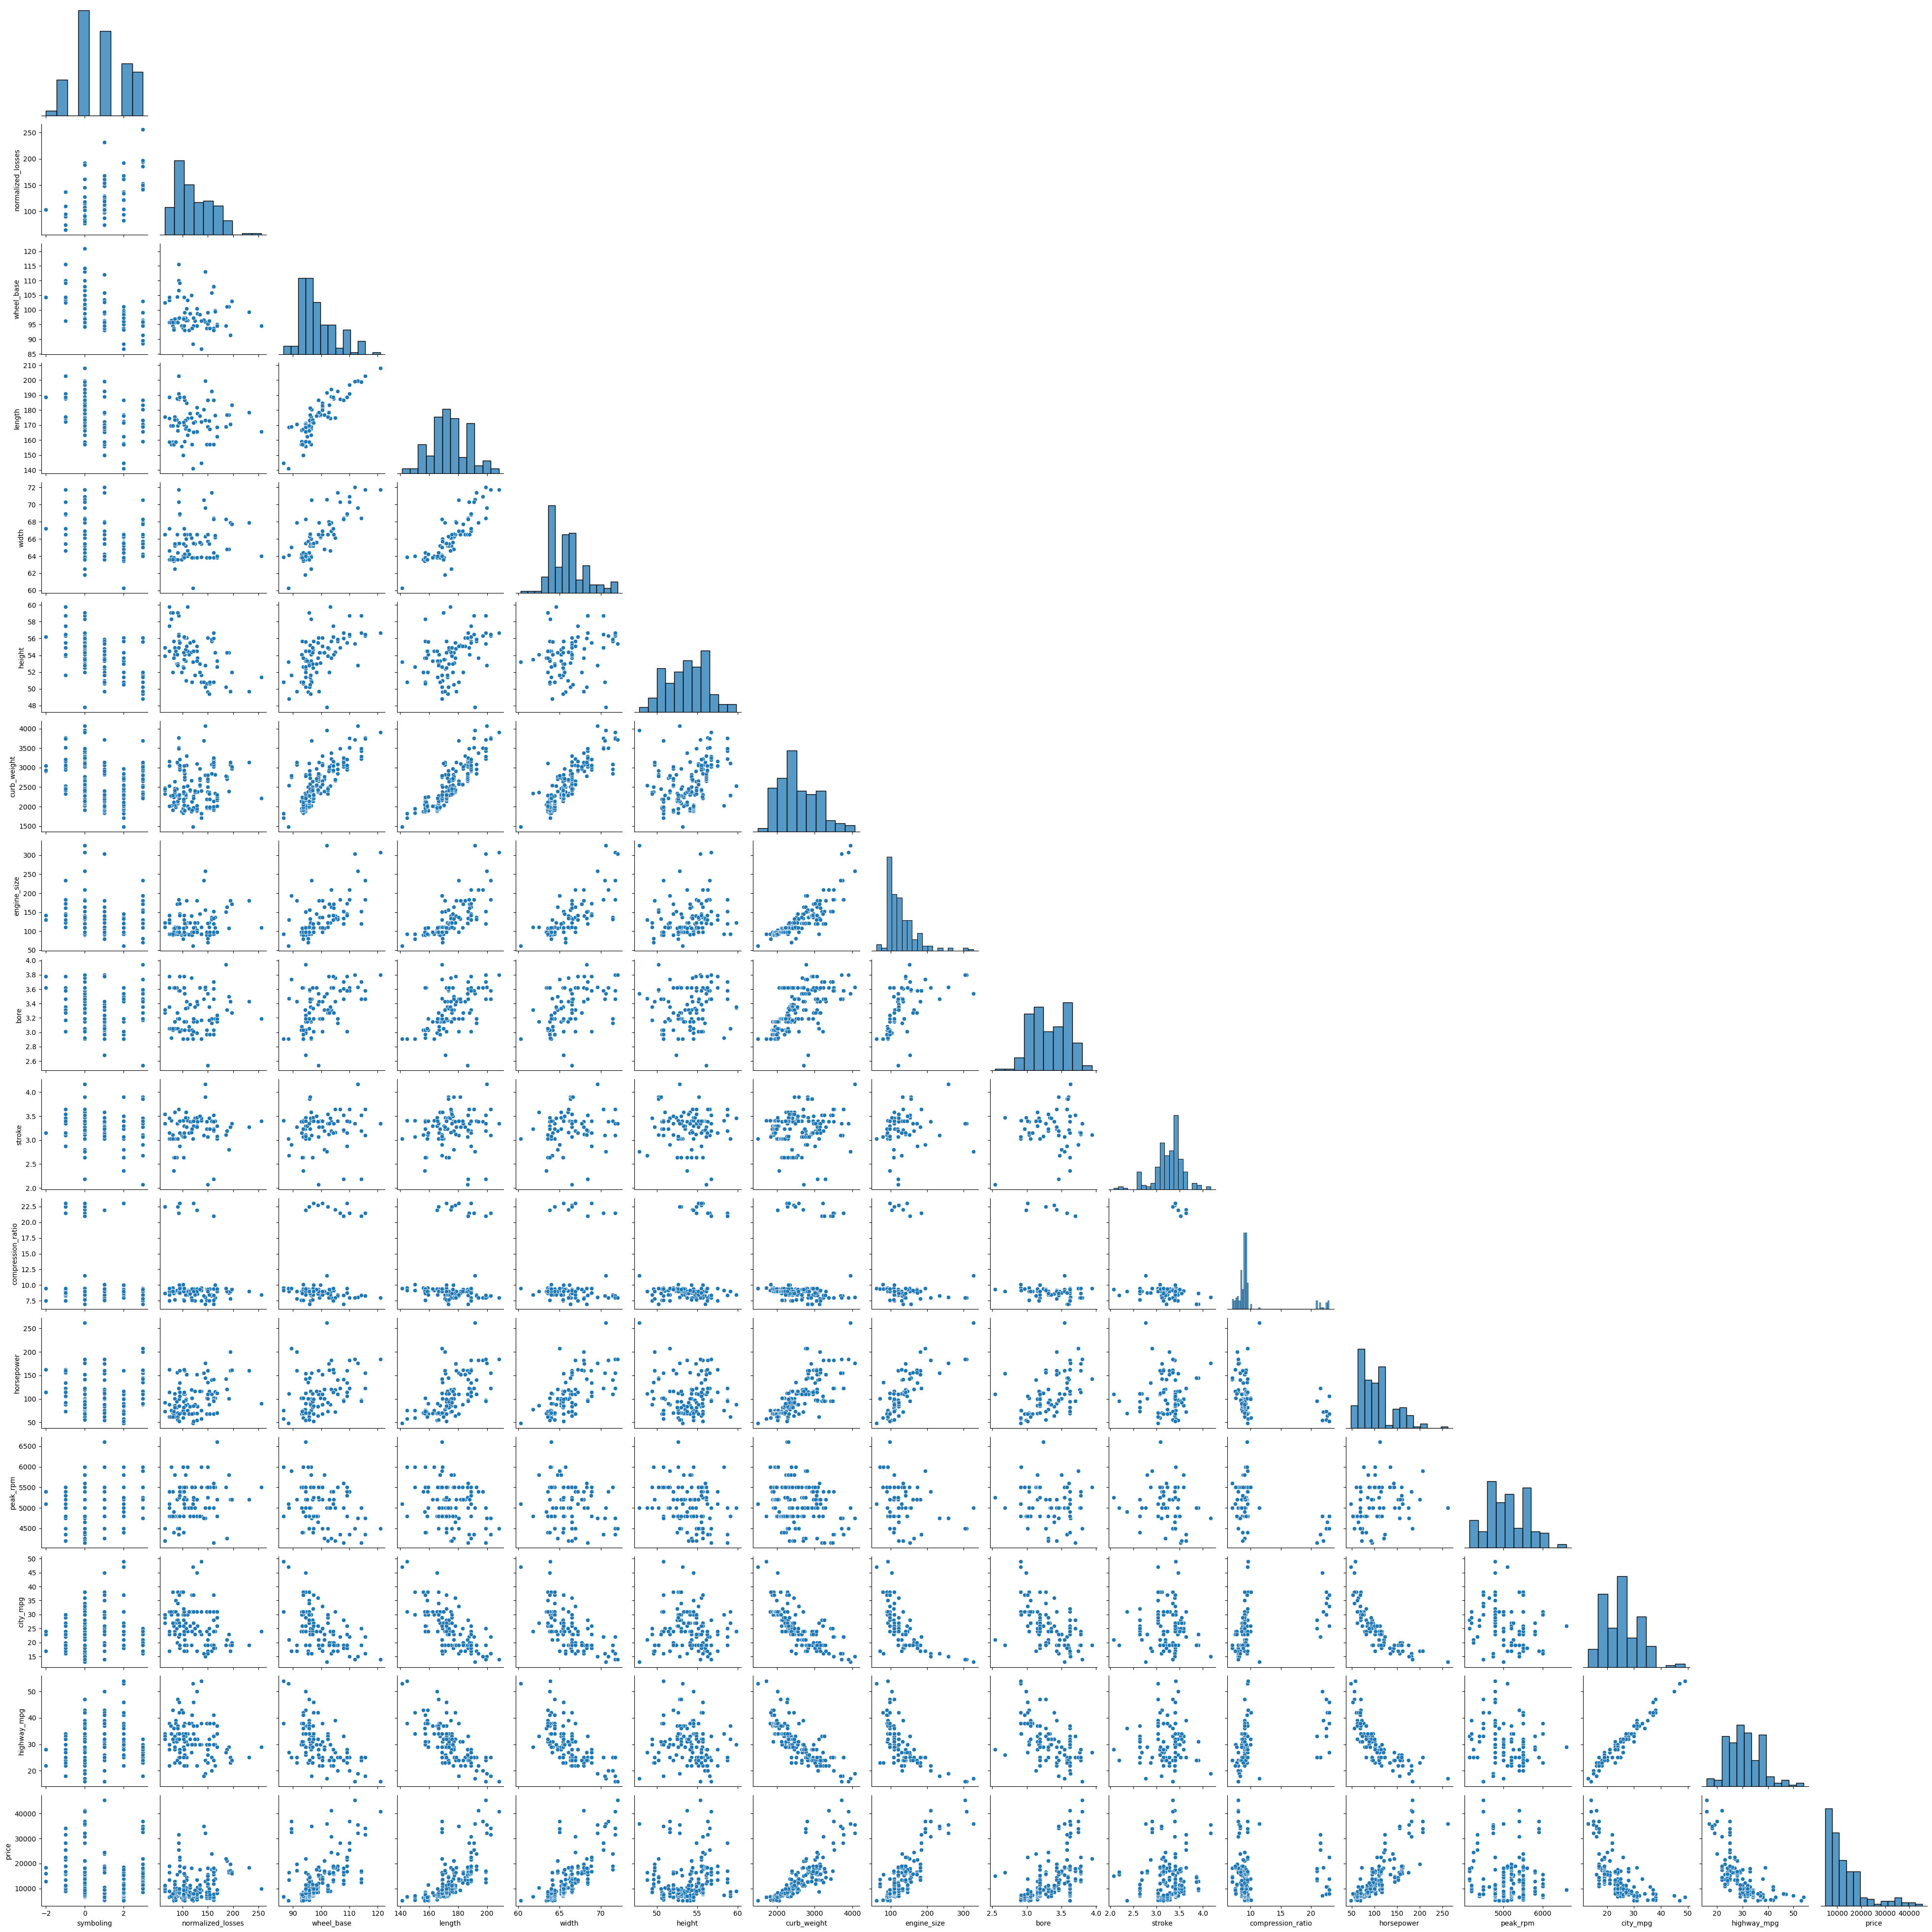

In [22]:
sns.pairplot(data=data, corner=True)

# Data Preprocessing

In [23]:
# checking null values
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

### Missing Values Summary

- **Columns with Missing Values**: `normalized_losses` (37), `num_of_doors` (2), `bore` (4), `stroke` (4), `horsepower` (2), `peak_rpm` (2).
- **Insight**: `normalized_losses` has the most missing values, followed by `bore` and `stroke`. Addressing these will be important for data completeness.


In [24]:
data.duplicated().sum()

0

### normalized_losses

<Axes: xlabel='normalized_losses', ylabel='Count'>

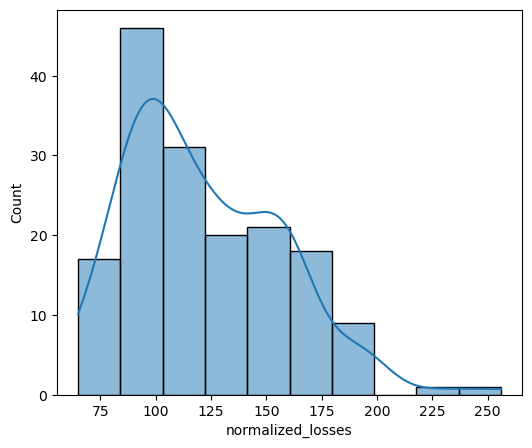

In [25]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="normalized_losses",kde=True)

In [26]:
data['normalized_losses'].median()

115.0

In [27]:
# replace null values by median
data.loc[data['normalized_losses'].isnull()==True,'normalized_losses']=115.0

### num_of_doors

<Axes: xlabel='num_of_doors', ylabel='Count'>

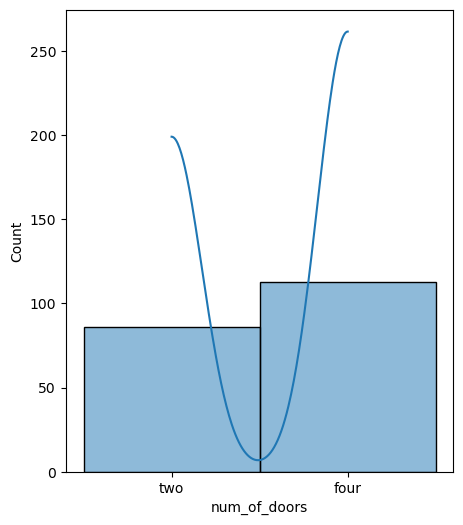

In [28]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x='num_of_doors',kde=True)

In [29]:
 data['num_of_doors'].mode()

0    four
Name: num_of_doors, dtype: object

In [30]:
data.loc[data['num_of_doors'].isnull(), 'num_of_doors'] = "four"

### bore

<Axes: xlabel='bore', ylabel='Count'>

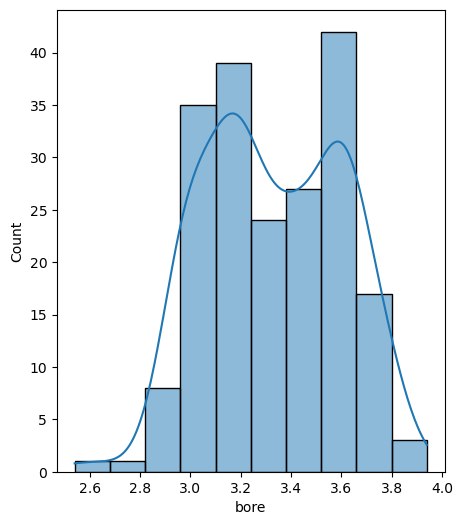

In [31]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.bore,kde="True")

In [32]:
 data['bore'].median()

3.31

In [33]:
data.loc[data['bore'].isnull(),'bore'] = 3.31

### stroke

<Axes: xlabel='stroke', ylabel='Count'>

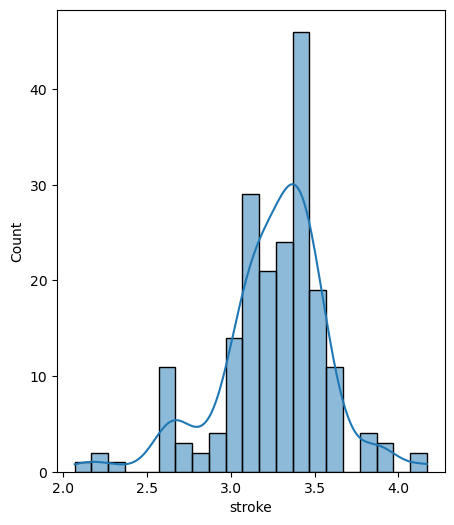

In [34]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.stroke,kde=True)

In [35]:
data['stroke'].median()

3.29

In [36]:
data.loc[data['stroke'].isnull(),'stroke'] = 3.29

### horsepower

<Axes: xlabel='horsepower', ylabel='Count'>

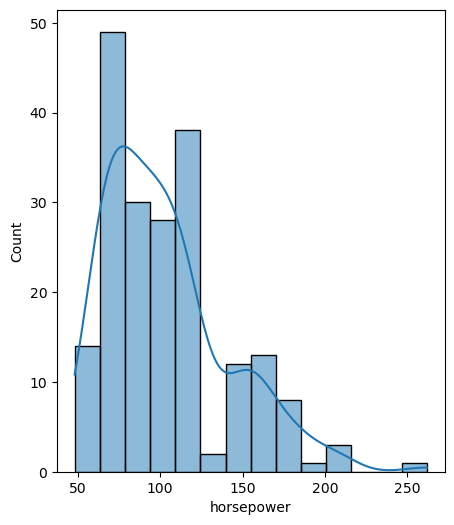

In [37]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.horsepower,kde="True")

In [38]:
data['horsepower'].median()

95.0

In [39]:
data.loc[data['horsepower'].isnull(),'horsepower'] = 95.0

### peak_rpm

<Axes: xlabel='peak_rpm', ylabel='Count'>

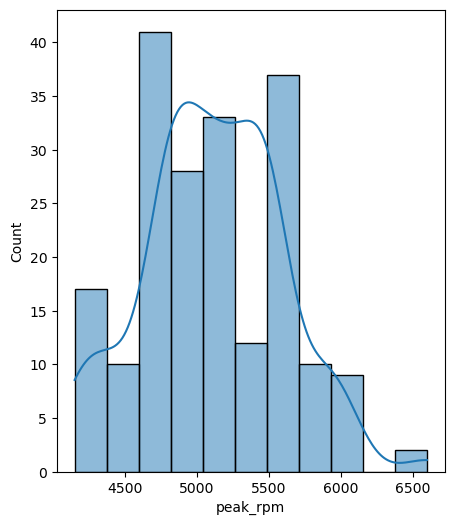

In [40]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.peak_rpm,kde="True")

In [41]:
data['peak_rpm'].median() 

5200.0

In [42]:
data.loc[data['peak_rpm'].isnull(),'peak_rpm'] = 5200.0

In [43]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Outlier Handling

In [44]:
num_data=data.select_dtypes(include=["int64","float64"]).columns
num_data

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

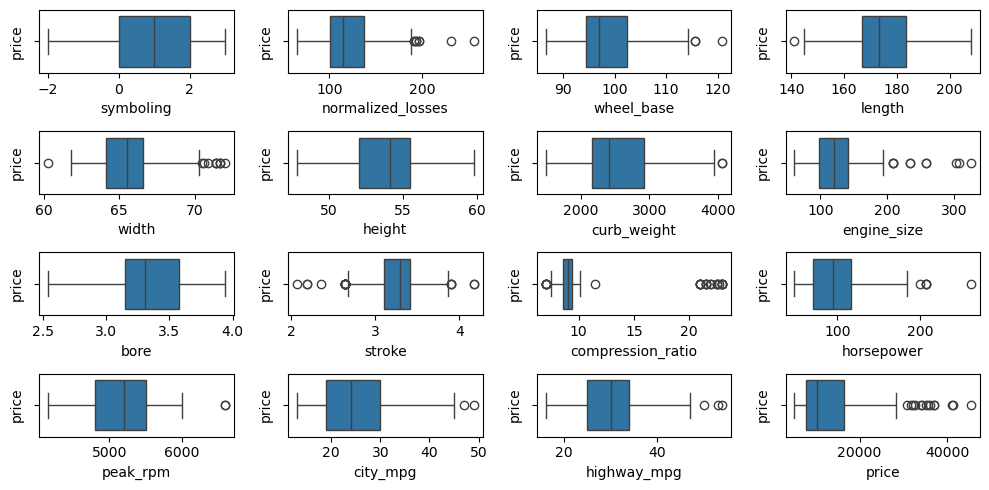

In [45]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in num_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

## normalized_losses

<Axes: xlabel='normalized_losses', ylabel='Count'>

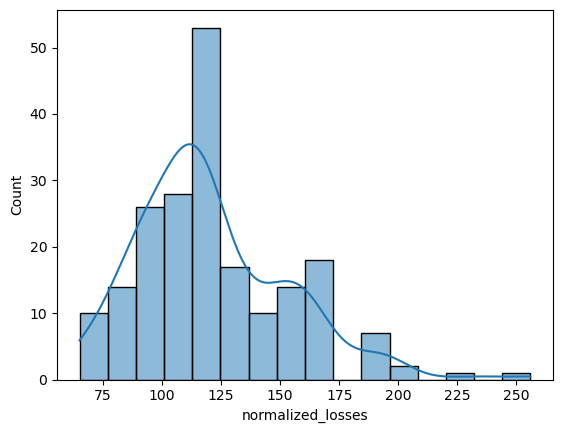

In [46]:
sns.histplot(data=data,x='normalized_losses',kde=True)

In [47]:
Q1 = data['normalized_losses'].quantile(0.25)
print("Q1",Q1)
Q3 = data['normalized_losses'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 101.0
Q3 137.0
IQR 36.0
lower_limit 47.0
upper_limit 191.0


In [48]:
len(data.loc[data["normalized_losses"]>upper_limit])/len(data)

0.03980099502487562

In [49]:
data.loc[data["normalized_losses"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925
101,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199
102,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699
103,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399
174,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558
175,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998
186,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980


In [50]:
data.loc[data["normalized_losses"]>upper_limit,"normalized_losses"]=data["normalized_losses"].median()

<Axes: xlabel='normalized_losses'>

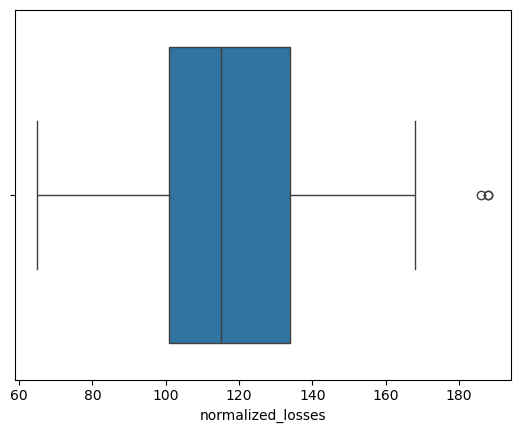

In [51]:
sns.boxplot(x=data['normalized_losses'])

## wheel_base

<Axes: xlabel='wheel_base', ylabel='Count'>

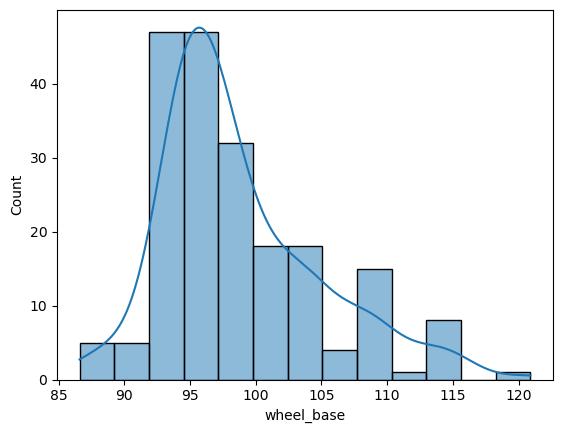

In [52]:
sns.histplot(data=data,x='wheel_base',kde=True)

In [53]:
Q1 = data['wheel_base'].quantile(0.25)
print("Q1",Q1)
Q3 = data['wheel_base'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 94.5
Q3 102.4
IQR 7.900000000000006
lower_limit 82.64999999999999
upper_limit 114.25000000000001


In [54]:
data.loc[data["wheel_base"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960


In [55]:
len(data.loc[data["wheel_base"]>upper_limit])/len(data)

0.014925373134328358

In [56]:
data.loc[data["wheel_base"]>upper_limit,"wheel_base"]=data["wheel_base"].median()

<Axes: xlabel='wheel_base'>

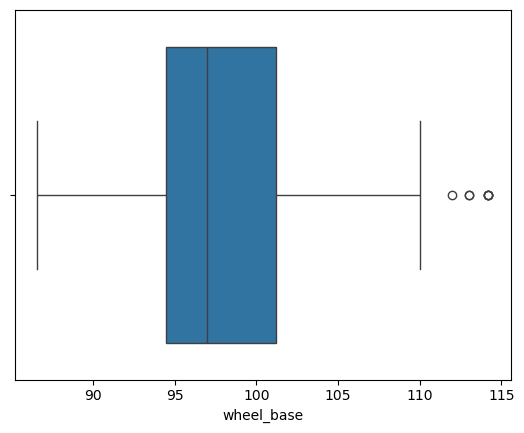

In [57]:
sns.boxplot(x=data['wheel_base'])

## length

<Axes: xlabel='length', ylabel='Count'>

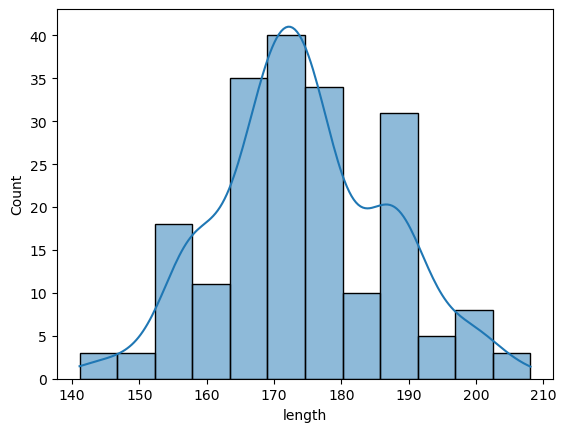

In [58]:
sns.histplot(data=data,x='length',kde=True)

In [59]:
Q1 = data['length'].quantile(0.25)
print("Q1",Q1)
Q3 = data['length'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 166.8
Q3 183.5
IQR 16.69999999999999
lower_limit 141.75000000000003
upper_limit 208.54999999999998


In [60]:
data.loc[data["length"]<lower_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151


In [61]:
data.loc[data['length']<lower_limit,'length']= data.length.median()

<Axes: xlabel='length'>

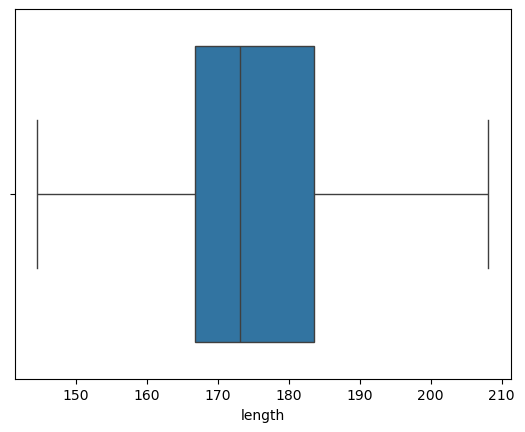

In [62]:
sns.boxplot(x=data['length'])

## width

<Axes: xlabel='width', ylabel='Count'>

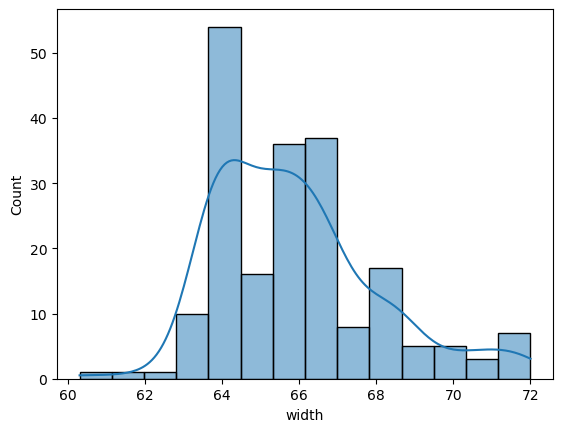

In [63]:
sns.histplot(data=data,x='width',kde=True)

In [64]:
Q1 = data['width'].quantile(0.25)
print("Q1",Q1)
Q3 = data['width'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 64.1
Q3 66.6
IQR 2.5
lower_limit 60.349999999999994
upper_limit 70.35


In [65]:
data.loc[data["width"]<lower_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151


In [66]:
data.loc[data['width']<lower_limit,'width'] = data['width'].median()

In [67]:
data.loc[data['width']>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
16,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


In [68]:
data.loc[data['width']>upper_limit,'width'] = data['width'].median()

<Axes: xlabel='width'>

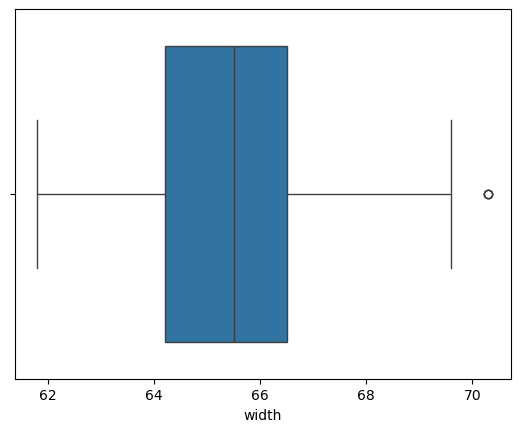

In [69]:
sns.boxplot(data=data,x='width')

## curb_weight

<Axes: xlabel='curb_weight', ylabel='Count'>

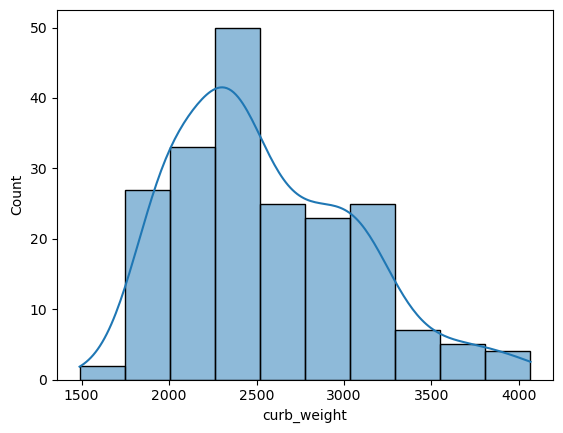

In [70]:
sns.histplot(data=data,x='curb_weight',kde=True)

In [71]:
Q1 = data['curb_weight'].quantile(0.25)
print("Q1",Q1)
Q3 = data['curb_weight'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 2169.0
Q3 2926.0
IQR 757.0
lower_limit 1033.5
upper_limit 4061.5


In [72]:
data.loc[data["curb_weight"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550


In [73]:
data.loc[data['curb_weight']>upper_limit,'curb_weight'] = data['curb_weight'].median()

<Axes: xlabel='curb_weight'>

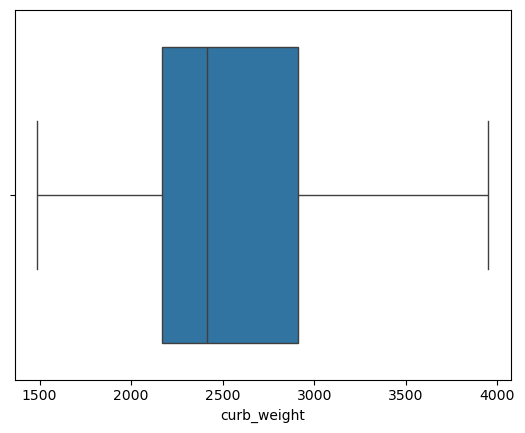

In [74]:
sns.boxplot(data=data,x='curb_weight')

## engine_size

<Axes: xlabel='engine_size', ylabel='Count'>

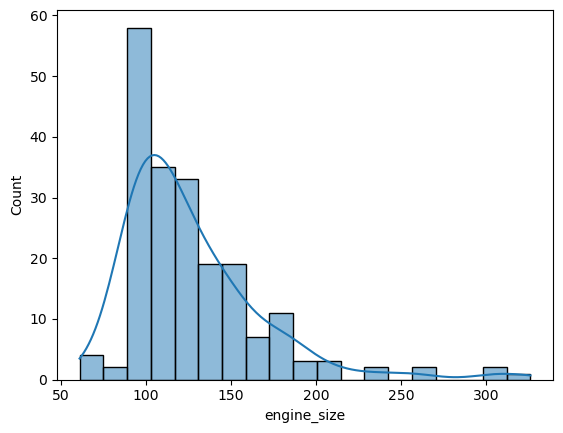

In [75]:
sns.histplot(data=data,x='engine_size',kde=True)

In [76]:
Q1 = data['engine_size'].quantile(0.25)
print("Q1",Q1)
Q3 = data['engine_size'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 98.0
Q3 141.0
IQR 43.0
lower_limit 33.5
upper_limit 205.5


In [77]:
data.loc[data["engine_size"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
14,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


In [78]:
data.loc[data["engine_size"]>upper_limit,'engine_size'] = data['engine_size'].median()

<Axes: xlabel='engine_size'>

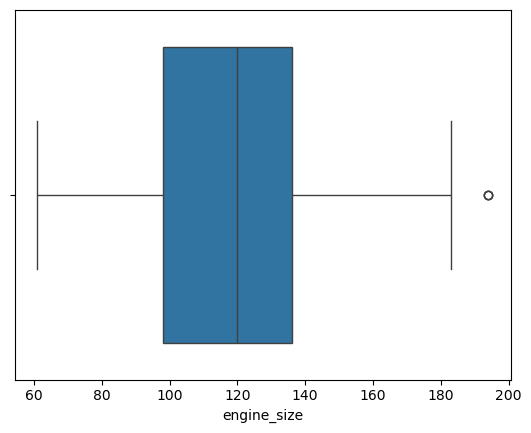

In [79]:
sns.boxplot(x=data['engine_size'])

## compression_ratio

<Axes: xlabel='compression_ratio', ylabel='Count'>

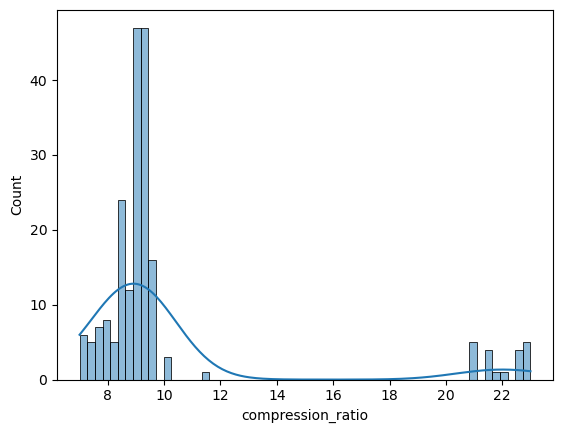

In [80]:
sns.histplot(data['compression_ratio'],kde=True)

In [81]:
Q1 = data['compression_ratio'].quantile(0.25)
print("Q1",Q1)
Q3 = data['compression_ratio'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 8.6
Q3 9.4
IQR 0.8000000000000007
lower_limit 7.399999999999999
upper_limit 10.600000000000001


In [82]:
data.loc[data["compression_ratio"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
60,0,115.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
63,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
87,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099
105,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
107,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860


In [83]:
data.loc[data["compression_ratio"]>upper_limit,'compression_ratio'] = data['compression_ratio'].median()

In [84]:
data.loc[data["compression_ratio"]<lower_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964
79,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629
80,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14869
81,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14489
114,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150
121,3,115.0,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,12764


In [85]:
data.loc[data["compression_ratio"]<lower_limit,'compression_ratio'] = data['compression_ratio'].median()

<Axes: xlabel='compression_ratio'>

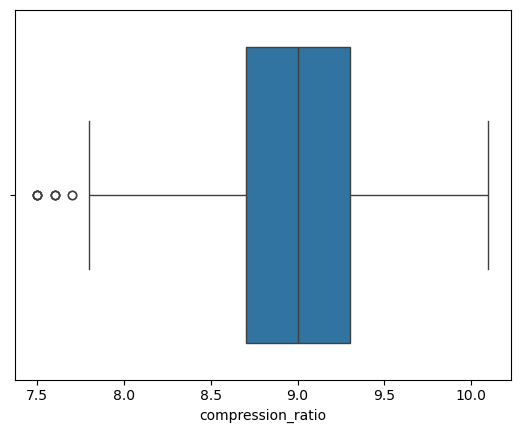

In [86]:
sns.boxplot(x=data['compression_ratio'])

## horsepower

<Axes: xlabel='horsepower', ylabel='Count'>

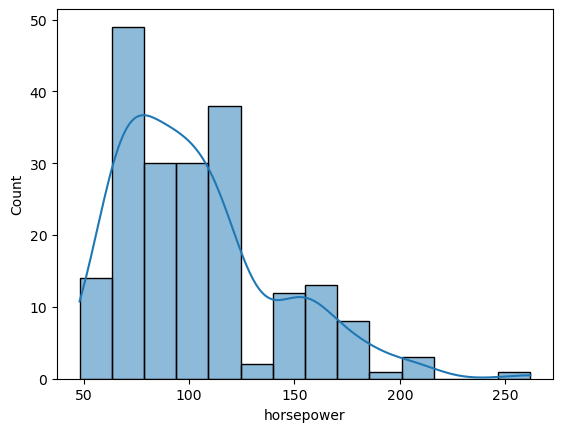

In [87]:
sns.histplot(x=data['horsepower'],kde=True)

In [88]:
Q1 = data['horsepower'].quantile(0.25)
print("Q1",Q1)
Q3 = data['horsepower'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 70.0
Q3 116.0
IQR 46.0
lower_limit 1.0
upper_limit 185.0


In [89]:
data.loc[data["horsepower"]>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,120,mpfi,3.54,2.76,9.0,262.0,5000.0,13,17,36000
102,3,115.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699
123,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528
124,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028
125,3,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028


In [90]:
data.loc[data["horsepower"]>upper_limit,"horsepower"]=data["horsepower"].median()

<Axes: xlabel='horsepower'>

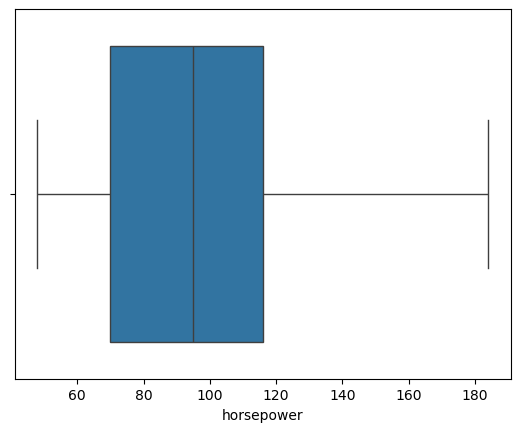

In [91]:
sns.boxplot(x=data['horsepower'])

## peak_rpm

<Axes: xlabel='peak_rpm', ylabel='Count'>

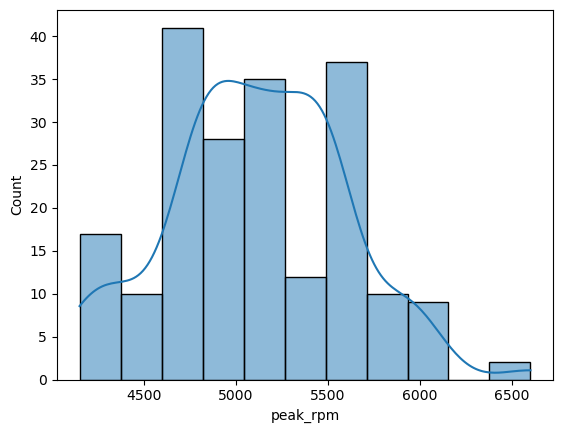

In [92]:
sns.histplot(x=data['peak_rpm'],kde=True)

In [93]:
Q1 = data['peak_rpm'].quantile(0.25)
print("Q1",Q1)
Q3 = data['peak_rpm'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 4800.0
Q3 5500.0
IQR 700.0
lower_limit 3750.0
upper_limit 6550.0


In [94]:
data.loc[data['peak_rpm']>upper_limit,'peak_rpm'] = data['peak_rpm'].median()

<Axes: xlabel='peak_rpm'>

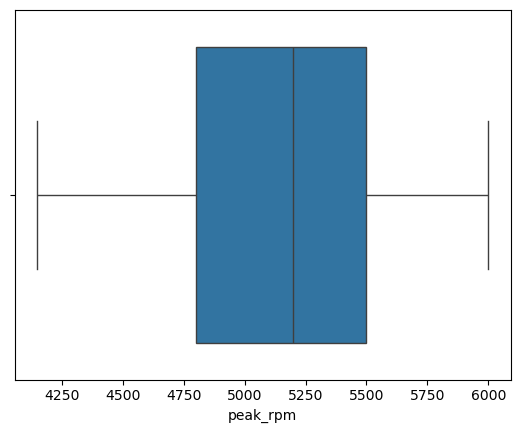

In [95]:
sns.boxplot(x=data['peak_rpm'])

## city_mpg

<Axes: xlabel='city_mpg', ylabel='Count'>

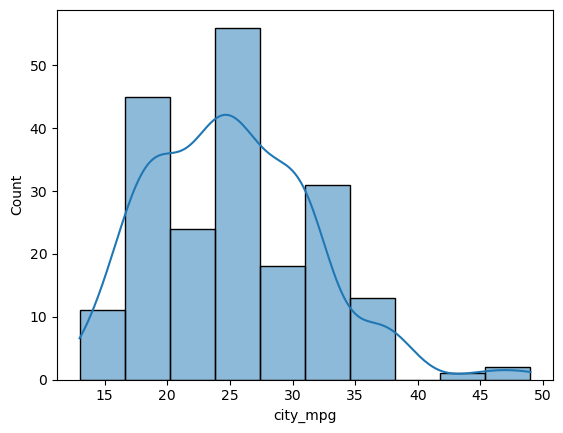

In [96]:
sns.histplot(x=data['city_mpg'],kde=True)

In [97]:
Q1 = data['city_mpg'].quantile(0.25)
print("Q1",Q1)
Q3 = data['city_mpg'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 19.0
Q3 30.0
IQR 11.0
lower_limit 2.5
upper_limit 46.5


In [98]:
data.loc[data['city_mpg']>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151
29,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479


In [99]:
data.loc[data['city_mpg']>upper_limit,'city_mpg'] = data['city_mpg'].median()

<Axes: xlabel='city_mpg'>

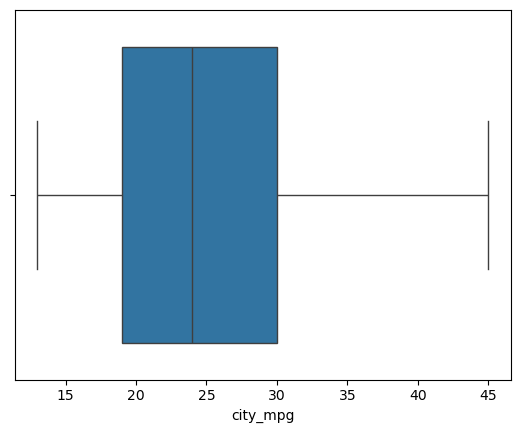

In [100]:
sns.boxplot(x=data['city_mpg'])

## highway_mpg

<Axes: xlabel='highway_mpg', ylabel='Count'>

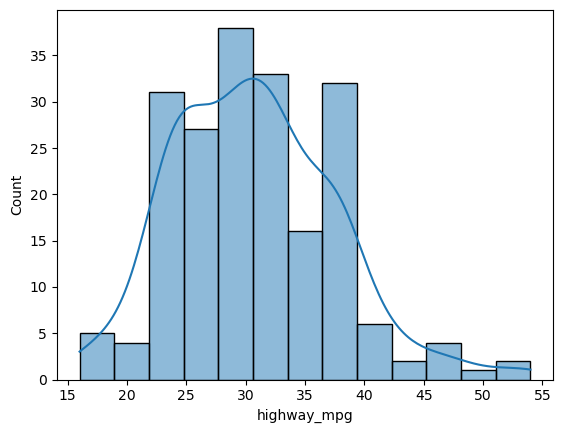

In [101]:
sns.histplot(x=data['highway_mpg'],kde=True)

In [102]:
Q1 = data['highway_mpg'].quantile(0.25)
print("Q1",Q1)
Q3 = data['highway_mpg'].quantile(0.75)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

Q1 25.0
Q3 34.0
IQR 9.0
lower_limit 11.5
upper_limit 47.5


In [103]:
data.loc[data['highway_mpg']>upper_limit]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,24,53,5151
29,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,24,54,6479
87,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,9.0,55.0,4800.0,45,50,7099


In [104]:
data.loc[data['highway_mpg']>upper_limit,'highway_mpg'] = data['highway_mpg'].median()

<Axes: xlabel='highway_mpg'>

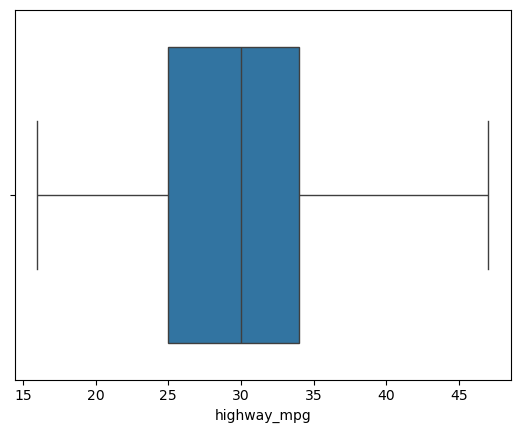

In [105]:
sns.boxplot(x=data['highway_mpg'])

# Categorical Data Conversion

### make

In [106]:
data.make.value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [107]:
Make= {
    'toyota': 0,
    'nissan': 1,
    'mazda': 2,
    'mitsubishi': 3,
    'honda': 4,
    'volkswagen': 5,
    'subaru': 6,
    'peugot': 7,
    'volvo': 8,
    'dodge': 9,
    'mercedes-benz': 10,
    'bmw': 11,
    'plymouth': 12,
    'audi': 13,
    'saab': 14,
    'porsche': 15,
    'jaguar': 16,
    'chevrolet': 17,
    'alfa-romero': 18,
    'isuzu': 19,
    'renault': 19,  # Assign the same label as 'isuzu'
    'mercury': 21
}

# Apply Manual encoding to 'make' column
data['make'] = data['make'].map(Make).astype(int)

### fuel_type

In [108]:
data.fuel_type.value_counts()

fuel_type
gas       181
diesel     20
Name: count, dtype: int64

In [109]:
fuel_type = {'gas': 1, 'diesel': 0} 
data['fuel_type'] = data['fuel_type'].map(fuel_type).astype(int)

### aspiration

In [110]:
data.aspiration.value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [111]:
aspiration = {'std': 0, 'turbo': 1}
data['aspiration'] = data['aspiration'].map(aspiration).astype(int)

### num_of_doors

In [112]:
data.num_of_doors.value_counts()

num_of_doors
four    115
two      86
Name: count, dtype: int64

In [113]:
num_of_doors = {'two':0,'four':1}
data['num_of_doors'] = data['num_of_doors'].map(num_of_doors).astype(int)

### body_style

In [114]:
data.body_style.value_counts()

body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [115]:
body_style = {
    'sedan': 0,
    'hatchback': 1,
    'wagon': 2,
    'hardtop': 3,
    'convertible': 4
}

data['body_style'] = data['body_style'].map(body_style).astype(int)



### drive_wheels

In [116]:
data['drive_wheels'].value_counts()

drive_wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [117]:
drive_wheels = {
    '4wd': 2,
    'rwd': 1,
    'fwd': 0
}

data['drive_wheels'] = data['drive_wheels'].map(drive_wheels).astype(int)

### engine_location

In [118]:
data['engine_location'].value_counts()

engine_location
front    198
rear       3
Name: count, dtype: int64

In [119]:
engine_location = {
    'rear': 1,
    'front': 0
}

data['engine_location'] = data['engine_location'].map(engine_location).astype(int)


### engine_type

In [120]:
data['engine_type'].value_counts()

engine_type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64

In [121]:
engine_type_encoding = {
    'ohc': 0,
    'ohcf': 1,
    'ohcv': 2,
    'dohc': 3,
    'l': 4,
    'rotor': 5
}
data['engine_type'] = data['engine_type'].map(engine_type_encoding)

# Convert to integer type explicitly
data['engine_type'] = data['engine_type'].astype(int)

### num_of_cylinders

In [122]:
data['num_of_cylinders'].value_counts()

num_of_cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [123]:
num_of_cylinders_expensive_encoding = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six': 4,
    'eight': 5,
    'twelve': 6
}

data['num_of_cylinders'] = data['num_of_cylinders'].map(num_of_cylinders_expensive_encoding).astype(int)


### fuel_system

In [124]:
data['fuel_system'].value_counts()

fuel_system
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [125]:
fuel_system_encoding = {
    'mpfi': 0,
    '2bbl': 1,
    'idi': 2,
    '1bbl': 3,
    'spdi': 4,
    '4bbl': 5,
    'mfi': 6,
    'spfi': 7
}

data['fuel_system'] = data['fuel_system'].map(fuel_system_encoding).astype(int)


In [126]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,18,1,0,0,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,18,1,0,0,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,18,1,0,0,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,13,1,0,1,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,13,1,0,1,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Feature Selection

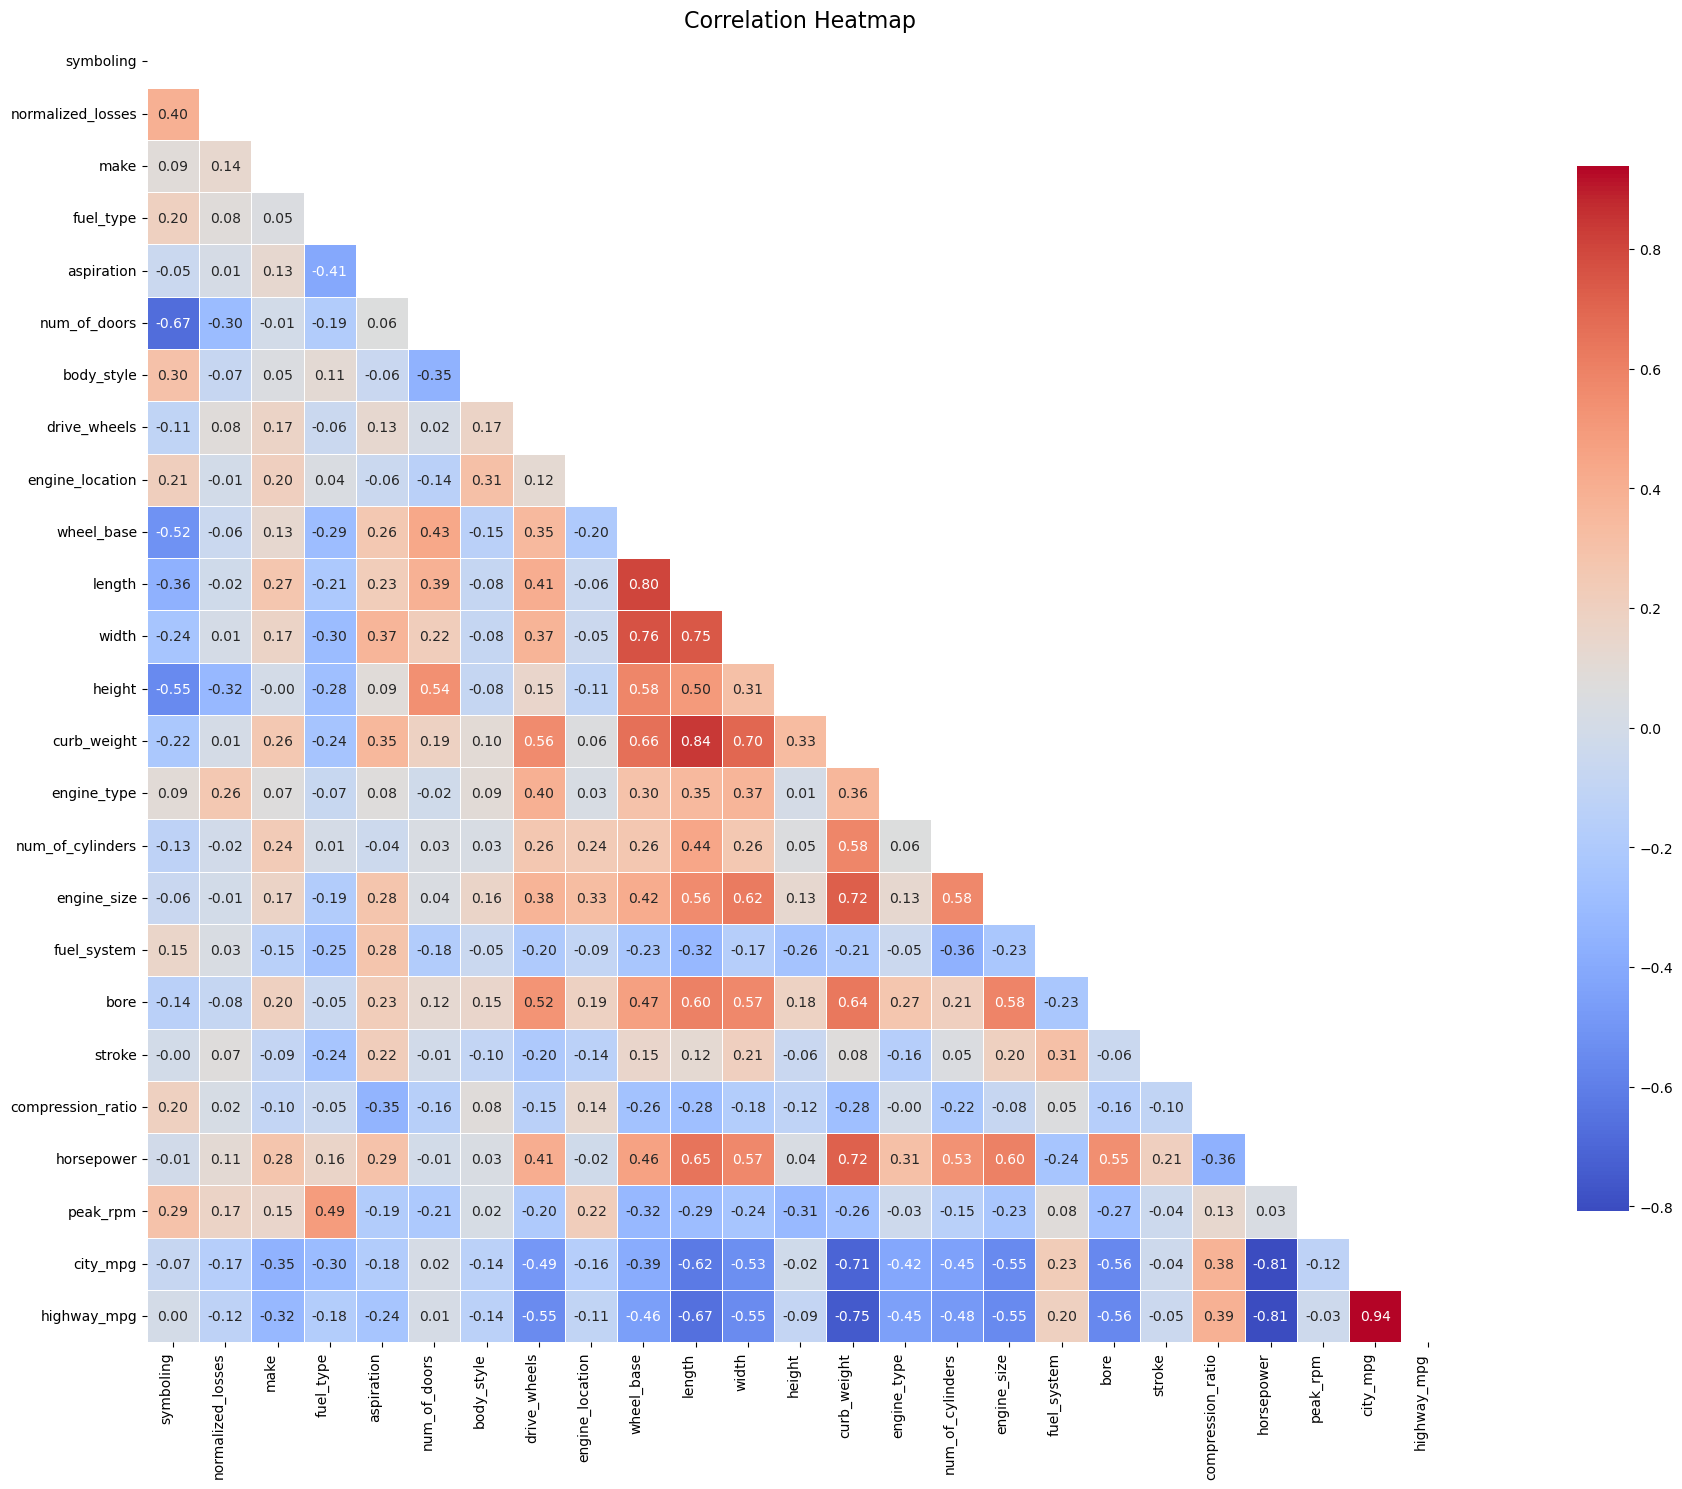

In [127]:
X = data.drop(columns = 'price')

correlation_matrix = X.corr()



plt.figure(figsize=(25, 15)) 


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title
plt.show()

In [128]:

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set the threshold for correlation
threshold = 0.75

# Create a set to hold the names of columns to drop
columns_to_drop = set()

# Identify highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Add the column with the lower variance to the drop set
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the identified columns from the DataFrame
data_reduced = data.drop(columns=columns_to_drop)

# Show the removed columns
print("Columns removed due to high correlation:")
print(columns_to_drop)

# Show the shape of the original and reduced DataFrame
print("\nOriginal DataFrame shape:", data.shape)
print("Reduced DataFrame shape:", data_reduced.shape)


Columns removed due to high correlation:
{'highway_mpg', 'curb_weight', 'width', 'city_mpg', 'length'}

Original DataFrame shape: (201, 26)
Reduced DataFrame shape: (201, 21)


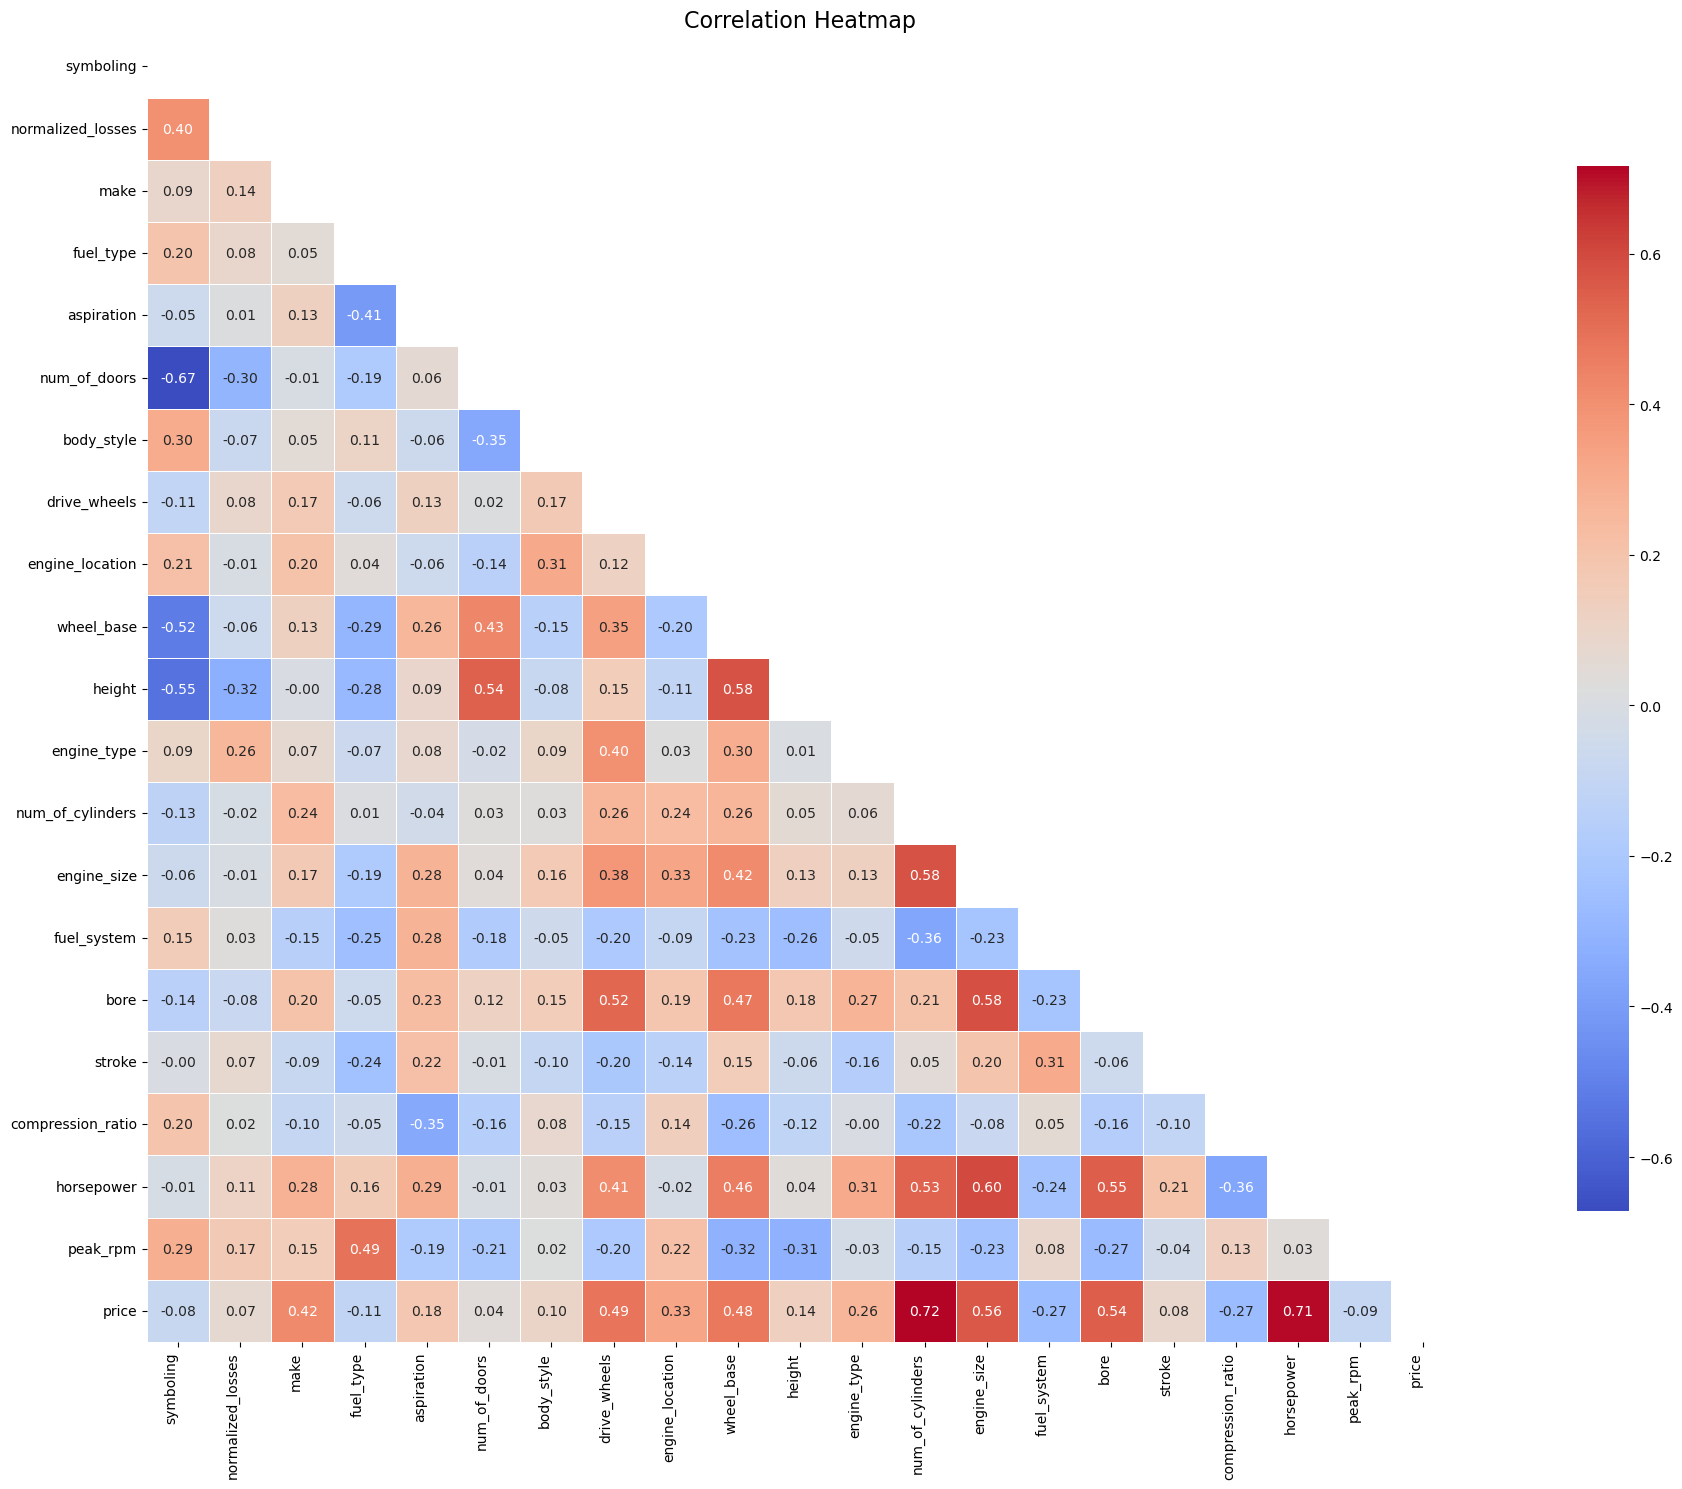

In [129]:
# Compute the correlation matrix
correlation_matrix =data_reduced.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 15))  # Adjust the size as necessary

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title
plt.show()

# Model Creation

In [130]:
X =data_reduced.drop("price",axis=1)
y = data_reduced['price']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

features_to_scale = ['normalized_losses', 'wheel_base', 'height', 'engine_size', 'bore', 
                    'stroke', 'compression_ratio', 'horsepower', 'peak_rpm']

# Fit and transform the training data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale ])

# Transform the test data
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

### Defining a Function for Model Building and its Evaluation

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    print("Evaluation Metrics:")
    print(f"The Mean Squared Error for this algorithm is  : {mse:.2f}")
    print(f"The Root Mean Squared Error for this algorithm is  : {rmse:.2f}")
    print(f"The Mean Absolute Error for this algorithm is : {mae:.2f}")
    print(f"The R² score for this algorithm is            : {r2:.2f}")
    print(f"The Adjusted R² score for this algorithm is   : {adj_r:.2f}")



### Defining a Function for Cross-Validation Evaluation of a Model

In [134]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def cross_val_evaluation(model, X, y, cv=5):
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

    mse_mean = mse_scores.mean()
    mae_mean = mae_scores.mean()
    r2_mean = r2_scores.mean()

    rmse_mean = np.sqrt(mse_mean)
    adj_r2_mean = 1 - (1 - r2_mean) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

    print("Score after cross validation:")
    print(f"Mean Squared Error (CV)     : {mse_mean:.2f}")
    print(f"Root Mean Squared Error (CV): {rmse_mean:.2f}")
    print(f"Mean Absolute Error (CV)    : {mae_mean:.2f}")
    print(f"R² Score (CV)               : {r2_mean:.2f}")
    print(f"Adjusted R² Score (CV)      : {adj_r2_mean:.2f}")


# 1. LINEAR REGRESSION ALGORITHM

In [135]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
print("Linear Regression Evaluation")
evaluation_score(lr, X_train, y_train, X_test, y_test)

Linear Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 19596379.22
The Root Mean Squared Error for this algorithm is  : 4426.78
The Mean Absolute Error for this algorithm is : 3007.02
The R² score for this algorithm is            : 0.84
The Adjusted R² score for this algorithm is   : 0.68


In [136]:
print("After Cross Validation Linear Regression Evaluation")
cross_val_evaluation(lr, X, y, cv=5)

After Cross Validation Linear Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 12086293.76
Root Mean Squared Error (CV): 3476.53
Mean Absolute Error (CV)    : 2609.16
R² Score (CV)               : 0.75
Adjusted R² Score (CV)      : 0.73


# 2. SUPPORT VECTOR MACHINE ALGORITHM

In [137]:
from sklearn.svm import SVR
svr = SVR()
print("Support Vector Regression Evaluation")
evaluation_score(svr, X_train, y_train, X_test, y_test)

Support Vector Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 149146286.53
The Root Mean Squared Error for this algorithm is  : 12212.55
The Mean Absolute Error for this algorithm is : 7944.51
The R² score for this algorithm is            : -0.22
The Adjusted R² score for this algorithm is   : -1.44


## Hyperparameter Tuning for SVR

In [138]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  
    'epsilon': [0.1, 0.5],  
    'kernel': ['linear', 'rbf'],  l
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model on training data with cross-validation
grid_search.fit(X_train, y_train)

print("After Hyperparameter Tunning Support Vector Regression Evaluation")
# Get the best model after hyperparameter tuning
best_svr_model = grid_search.best_estimator_

# Output the best parameters found during the tuning
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model using the evaluation_score function
evaluation_score(best_svr_model, X_train, y_train, X_test, y_test)


After Hyperparameter Tunning Support Vector Regression Evaluation
Best hyperparameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 87103473.04
The Root Mean Squared Error for this algorithm is  : 9332.92
The Mean Absolute Error for this algorithm is : 5677.81
The R² score for this algorithm is            : 0.29
The Adjusted R² score for this algorithm is   : -0.42


In [139]:
print("After Cross Validation  Support Vector Regression Evaluation")
cross_val_evaluation(best_svr_model, X, y, cv=5)

After Cross Validation  Support Vector Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 30952796.01
Root Mean Squared Error (CV): 5563.52
Mean Absolute Error (CV)    : 3147.15
R² Score (CV)               : 0.57
Adjusted R² Score (CV)      : 0.52


# 3. K-NEAREST NEIGHBOURS ALGORITHM

In [140]:
from sklearn.neighbors import KNeighborsRegressor

error_rate =[]

for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate

[0.975609756097561, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

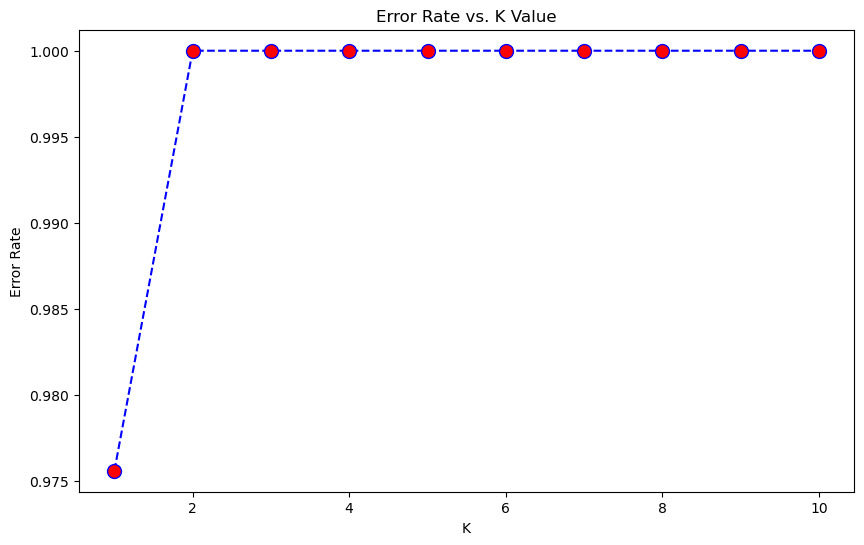

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [142]:
print("K-Nearest Neighbors (KNN) Evaluation")
KNN = KNeighborsRegressor(n_neighbors = 2)
evaluation_score(KNN, X_train, y_train, X_test, y_test)

K-Nearest Neighbors (KNN) Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 15590709.25
The Root Mean Squared Error for this algorithm is  : 3948.51
The Mean Absolute Error for this algorithm is : 2639.82
The R² score for this algorithm is            : 0.87
The Adjusted R² score for this algorithm is   : 0.75


##  Hyperparameter Tuning for KNN

In [143]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsRegressor()


param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model on training data with cross-validation
grid_search.fit(X_train, y_train)

print("After Hyperparameter tunning K-Nearest Neighbors (KNN) Evaluation")
# Get the best model after hyperparameter tuning
best_knn_model = grid_search.best_estimator_

# Output the best parameters found during the tuning
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model using the evaluation_score function
evaluation_score(best_knn_model, X_train, y_train, X_test, y_test)


After Hyperparameter tunning K-Nearest Neighbors (KNN) Evaluation
Best hyperparameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 11977800.15
The Root Mean Squared Error for this algorithm is  : 3460.90
The Mean Absolute Error for this algorithm is : 2190.36
The R² score for this algorithm is            : 0.90
The Adjusted R² score for this algorithm is   : 0.80


In [144]:
print("After Cross Validation K-Nearest Neighbors (KNN) Evaluation")
cross_val_evaluation(best_knn_model, X_train, y_train, cv=5)

After Cross Validation K-Nearest Neighbors (KNN) Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 12543043.69
Root Mean Squared Error (CV): 3541.62
Mean Absolute Error (CV)    : 2188.56
R² Score (CV)               : 0.73
Adjusted R² Score (CV)      : 0.69


# 4. DECISION TREE ALGORITHM

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
dtr = DecisionTreeRegressor(max_depth=20, criterion='absolute_error')

print("Decision Tree Regression Evaluation")

evaluation_score(dtr, X_train, y_train, X_test, y_test)

Decision Tree Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 12071610.49
The Root Mean Squared Error for this algorithm is  : 3474.42
The Mean Absolute Error for this algorithm is : 2346.73
The R² score for this algorithm is            : 0.90
The Adjusted R² score for this algorithm is   : 0.80


## Hyperparameter Tuning for Decision Tree

In [146]:

dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  
    
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

print(" After Hyperparameter tunning Decision Tree Regression Evaluation")


print(f"Best hyperparameters: {grid_search.best_params_}")

evaluation_score(best_dt_model, X_train, y_train, X_test, y_test)


 After Hyperparameter tunning Decision Tree Regression Evaluation
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 11488964.19
The Root Mean Squared Error for this algorithm is  : 3389.54
The Mean Absolute Error for this algorithm is : 2240.84
The R² score for this algorithm is            : 0.91
The Adjusted R² score for this algorithm is   : 0.81


In [147]:
print("After Cross validation Decision Tree Regression Evaluation")

cross_val_evaluation(best_dt_model, X, y, cv=5)

After Cross validation Decision Tree Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 13589515.87
Root Mean Squared Error (CV): 3686.40
Mean Absolute Error (CV)    : 2824.79
R² Score (CV)               : 0.52
Adjusted R² Score (CV)      : 0.47


# 5. RANDOM FOREST ALGORITHM

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
print("Random Forest Regression Evaluation")
evaluation_score(rfr, X_train, y_train, X_test, y_test)

Random Forest Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 18772102.92
The Root Mean Squared Error for this algorithm is  : 4332.68
The Mean Absolute Error for this algorithm is : 2796.36
The R² score for this algorithm is            : 0.85
The Adjusted R² score for this algorithm is   : 0.69


## Hyperparameter Tuning for Random Forest

In [149]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

random_rf = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_rf.fit(X_train, y_train)
print("After Hyperparameter Tunning Random Forest Regression Evaluation")


best_params = random_rf.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rf = random_rf.best_estimator_

evaluation_score(best_rf, X_train, y_train, X_test, y_test)

After Hyperparameter Tunning Random Forest Regression Evaluation
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 17402645.38
The Root Mean Squared Error for this algorithm is  : 4171.65
The Mean Absolute Error for this algorithm is : 2720.69
The R² score for this algorithm is            : 0.86
The Adjusted R² score for this algorithm is   : 0.72


In [150]:
print("After scross Validation Random Forest Regression Evaluation")

cross_val_evaluation(best_rf, X_train, y_train, cv=5)


After scross Validation Random Forest Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 9783791.65
Root Mean Squared Error (CV): 3127.91
Mean Absolute Error (CV)    : 1978.12
R² Score (CV)               : 0.78
Adjusted R² Score (CV)      : 0.75


# 6. XGBOOST ALGORITHM

In [151]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
print("XGBoost Regression Evaluation")

evaluation_score(xgb_model, X_train, y_train, X_test, y_test)

XGBoost Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 12637911.52
The Root Mean Squared Error for this algorithm is  : 3554.98
The Mean Absolute Error for this algorithm is : 2329.31
The R² score for this algorithm is            : 0.90
The Adjusted R² score for this algorithm is   : 0.79


## Hyperparameter Tuning for XGBOOST 

In [152]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 1, 5, 10, 12]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xg_reg,
    param_distributions=param_dist,
    n_iter=15,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(
    X_train, y_train,
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10, 
    verbose=False
)
print("After Hyperparameter tunning XGBoost Regression Evaluation")

best_params = random_search_xgb.best_params_
print(f"Best Hyperparameters: {best_params}")

best_xg_reg = random_search_xgb.best_estimator_

evaluation_score(best_xg_reg, X_train, y_train, X_test, y_test)


After Hyperparameter tunning XGBoost Regression Evaluation
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 1.0, 'alpha': 10}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 11182182.12
The Root Mean Squared Error for this algorithm is  : 3343.98
The Mean Absolute Error for this algorithm is : 2058.15
The R² score for this algorithm is            : 0.91
The Adjusted R² score for this algorithm is   : 0.82


In [153]:
print("After Scross Validation XGBoost Regression Evaluation")

cross_val_evaluation(best_xg_reg, X, y, cv=7)

After Scross Validation XGBoost Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 7102279.77
Root Mean Squared Error (CV): 2665.01
Mean Absolute Error (CV)    : 1831.23
R² Score (CV)               : 0.85
Adjusted R² Score (CV)      : 0.83


# 7. GRADIENT BOOSTING ALGORITHM

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
print("Gradient Boosting Regression Evaluation")

evaluation_score(gb_reg, X_train, y_train, X_test, y_test)

Gradient Boosting Regression Evaluation
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 9099383.57
The Root Mean Squared Error for this algorithm is  : 3016.52
The Mean Absolute Error for this algorithm is : 1933.99
The R² score for this algorithm is            : 0.93
The Adjusted R² score for this algorithm is   : 0.85


### Hyperparameter Tuning for Gradient Boosting Algorithm

In [155]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_gbr = RandomizedSearchCV(estimator=gb_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_gbr.fit(X_train, y_train)
print("After Hyperparameter tunning Gradient Boosting Regression Evaluation")

best_params = random_gbr.best_params_
print(f"Best Hyperparameters: {best_params}")
best_gb_reg = random_gbr.best_estimator_
evaluation_score(best_gb_reg, X_train, y_train, X_test, y_test)

After Hyperparameter tunning Gradient Boosting Regression Evaluation
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'learning_rate': 0.1}
Evaluation Metrics:
The Mean Squared Error for this algorithm is  : 7868043.22
The Root Mean Squared Error for this algorithm is  : 2805.00
The Mean Absolute Error for this algorithm is : 1824.51
The R² score for this algorithm is            : 0.94
The Adjusted R² score for this algorithm is   : 0.87


In [156]:
print("After Scross Validation Gradient Boosting Regression Evaluation")

cross_val_evaluation(best_gb_reg, X, y, cv=7)

After Scross Validation Gradient Boosting Regression Evaluation
Score after cross validation:
Mean Squared Error (CV)     : 6873409.82
Root Mean Squared Error (CV): 2621.72
Mean Absolute Error (CV)    : 1743.42
R² Score (CV)               : 0.84
Adjusted R² Score (CV)      : 0.82


# Automobile Import Price Prediction: Model Performance Comparison

## Introduction
This report compares the performance of various machine learning models in predicting automobile import prices. The models tested include **Linear Regression**, **Support Vector Regression (SVR)**, **K-Nearest Neighbors (KNN)**, **Decision Tree Regression (DTR)**, **Random Forest Regression (RFR)**, **XGBoost**, and **Gradient Boosting Regression (GBR)**. The comparison uses key metrics such as **MSE**, **RMSE**, **MAE**, **R²**, **Adjusted R²**, and **Cross-Validation (CV) scores** to identify the most effective model.

---

## Model Performance Comparison Table

| **Model**                    | **MSE (Before)**  | **RMSE (Before)** | **MAE (Before)**  | **R² (Before)**  | **Adj. R² (Before)** | **MSE (After)**   | **RMSE (After)**  | **MAE (After)**  | **R² (After)**  | **Adj. R² (After)** | **MSE (CV)**     | **RMSE (CV)**   | **MAE (CV)**     | **R² (CV)**   | **Adj. R² (CV)** |
|------------------------------|-------------------|-------------------|-------------------|------------------|----------------------|-------------------|-------------------|-------------------|------------------|---------------------|-------------------|------------------|------------------|-----------------|------------------|
| **Linear Regression**         | 19,596,379.22     | 4,426.78          | 3,007.02          | 0.84             | 0.68                 | 12,086,293.76     | 3,476.53          | 2,609.16          | 0.75             | 0.73                | 12,086,293.76     | 3,476.53          | 2,609.16          | 0.75             | 0.73              |
| **SVR**                       | 149,146,286.53    | 12,212.55         | 7,944.51          | -0.22            | -1.44                | 87,103,473.04     | 9,332.92          | 5,677.81          | 0.29             | -0.42               | 30,952,796.01     | 5,563.52          | 3,147.15          | 0.57             | 0.52              |
| **KNN**                       | 15,590,709.25     | 3,948.51          | 2,639.82          | 0.87             | 0.75                 | 11,977,800.15     | 3,460.90          | 2,190.36          | 0.90             | 0.80                | 12,543,043.69     | 3,541.62          | 2,188.56          | 0.73             | 0.69              |
| **Decision Tree**             | 9,235,088.39      | 3,038.93          | 2,083.07          | 0.92             | 0.85                 | 11,049,356.42     | 3,324.06          | 2,254.76          | 0.91             | 0.82                | 8,992,285.96      | 2,998.71          | 1,954.25          | 0.81             | 0.79              |
| **Random Forest**             | 18,360,051.87     | 4,284.86          | 2,809.38          | 0.85             | 0.70                 | 25,038,187.55     | 5,003.82          | 3,243.17          | 0.80             | 0.59                | 11,430,631.63     | 3,380.92          | 2,065.31          | 0.76             | 0.72              |
| **XGBoost**                   | 12,637,911.52     | 3,554.98          | 2,329.31          | 0.90             | 0.79                 | 11,182,182.12     | 3,343.98          | 2,058.15          | 0.91             | 0.82                | 7,102,279.77      | 2,665.01          | 1,831.23          | 0.85             | 0.83              |
| **Gradient Boosting**         | 9,099,383.57      | 3,016.52          | 1,933.99          | 0.93             | 0.85                 | 7,868,043.22      | 2,805.00          | 1,824.51          | 0.94             | 0.87                | 6,873,409.82      | 2,621.72          | 1,743.42          | 0.84             | 0.82              |

---

## Key Insights

1. **Best Performing Model**:
   - **Gradient Boosting Regression (GBR)** achieves the highest **R²** score (0.94) and **lowest MSE** (7,868,043.22), making it the **best model** for predicting automobile import prices.
   - Its **CV performance** (R² = 0.84) further confirms that it generalizes well across different data splits.

2. **Other Strong Models**:
   - **K-Nearest Neighbors (KNN)** performs well, with an **R²** of 0.90 after tuning and competitive **CV scores** (R² = 0.73).
   - **Decision Tree Regression (DTR)** is also a strong performer, with an **R²** of 0.91 post-tuning, and **CV performance** (R² = 0.81) shows it performs consistently on unseen data.
   - **XGBoost** is another top contender, showing an **R²** of 0.91 after tuning and strong **CV performance** (R² = 0.85).

3. **Models to Avoid**:
   - **Support Vector Regression (SVR)** underperforms with an **R²** of -0.22 before tuning and a marginal improvement to 0.29 after tuning.
   - Its **CV performance** is also weak (R² = 0.57), indicating poor generalization and suggesting it is **not a good fit** for this problem.

---

## Conclusion

- **Best Model**: **Gradient Boosting Regression (GBR)** stands out as the best model with the highest **R² (0.94)** and lowest **MSE (7,868,043.22)**, along with solid **cross-validation (CV)** performance.
- **Other Top Models**:  
  - **K-Nearest Neighbors (KNN)** and **Decision Tree Regression (DTR)** are also strong performers, with good R² and solid CV scores.
  - **XGBoost** performs well too, making it a viable alternative.

- **Avoid**:  
  - **Support Vector Regression (SVR)** should be avoided due to its consistently poor performance across all metrics, including **CV scores** (R² = 0.57).

### Summary

- **Top Model**: **Gradient Boosting Regression (GBR)**
- **Alternative Strong Models**: **KNN**, **DTR**, **XGBoost**
- **Avoid**: **SVR**

By choosing **GBR**, you can expect **accurate predictions** for automobile import prices with good generalization to unseen data.

---

### Why GBR?
The **Gradient Boosting Regression (GBR)** model provides **the best overall performance** in terms of prediction accuracy and generalization (cross-validation). This makes it the most reliable model for production use.


---
---
# Report on Challenges Faced in Data Preprocessing and Model Training

During the process of preparing the dataset and training machine learning models, several challenges were encountered. These challenges stemmed from issues in the data itself as well as in building and tuning effective models. Below are the key challenges, along with the techniques employed to overcome them.

### 1. **No Column Names**
- **Challenge**: The dataset lacked column names, which made it difficult to interpret the data and understand what each feature represented.
- **Solution**: Column names were manually assigned based on the dataset's description and domain knowledge. This made the dataset more readable and easier to work with, ensuring that each feature could be properly identified and utilized in the modeling process.

### 2. **Handling Missing Data**
- **Challenge**: Several features had missing values, represented as '?'. This created issues in the data analysis and model training, as missing data can lead to biased or incomplete results.
- **Solution**: The '?' values were first replaced with `NaN`. I then handled missing values by imputing them with statistical measures: the **mean** for numerical features and the **mode** for categorical features. In cases where a feature had too many missing values, it was dropped altogether to avoid compromising model performance.

### 3. **Small Dataset Size**
- **Challenge**: The dataset contained only 201 entries and 26 features. A small dataset limits the ability to build a robust model, as it reduces the model's ability to generalize to unseen data.
- **Solution**: To address this, I used **cross-validation** to assess the model's performance on different subsets of the data. Cross-validation helped maximize the available data for training while reducing the risk of overfitting. Additionally, I considered using data augmentation techniques where feasible.

### 4. **Categorical Columns Manual Encoding**
- **Challenge**: The dataset contained categorical variables, which are not directly usable by machine learning algorithms that require numerical inputs.
- **Solution**: I manually encoded categorical features by mapping each unique category to a numerical value. This approach allowed me to convert categorical variables into a format that could be processed by machine learning algorithms without using external encoding libraries.

### 5. **High Feature Correlation**
- **Challenge**: Several features showed high correlation with each other (e.g., `'curb_weight'`, `'city_mpg'`, `'highway_mpg'`, `'length'`, and `'width'`). Highly correlated features can lead to multicollinearity, which affects model interpretability and can distort predictions.
- **Solution**: I removed features that were highly correlated to avoid multicollinearity. This reduced redundancy in the data, making the model more interpretable and efficient, and allowed it to focus on the most informative features for prediction.

### 6. **Feature Scaling Using StandardScaler**
- **Challenge**: Some features, such as `engine_size`, `horsepower`, and `height`, had vastly different scales. Algorithms like KNN or linear regression can be sensitive to these differences, leading to biased model performance.
- **Solution**: To resolve this, I applied **StandardScaler** to scale the numerical features. StandardScaler standardizes the features to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model without one dominating the others due to scale differences.

### 7. **Hyperparameter Tuning**
- **Challenge**: Selecting the optimal hyperparameters for the model can have a significant impact on its performance. Manually tuning these hyperparameters can be time-consuming and may not always result in the best model.
- **Solution**: I performed **hyperparameter tuning** using techniques like **Grid Search** and **Randomized Search**. These methods explore different combinations of hyperparameters to identify the best set. Hyperparameter tuning is crucial for improving model performance by finding the optimal values for parameters like learning rate, number of trees, or maximum depth, which help to balance bias and variance.

---

